# Jupyter Notebook 2: Preprocessing of the data

---

# Introduction

As discussed in the report, Preprocessing is a major step in the Data Science Project Pipeline and its steps must be recorded so that the results of the Research can be replicated in future work. This was a major drawback of previous research where very little time was given to any description of the Data Preprocessing steps taken in other research. 

Below are the steps that will be completed in this research, a detailed reason for each is included in the Thesis report.

**Preprocessing Steps: Explore the first dataset:**
- **Missing Values** 
- **Duplicate Rows (instances)**
- **Duplicate Columns**
- **Outliers**
- **Check each dataset have the same feature names**

**Preprocessing Steps: Perform actions:**
- **1. Remove Missing Values**
- **2. Remove Duplicate Rows**
- **3. Remove Duplicate Columns**
- **4. Remove the wrong "label" if it exists in the dataset**
- **5. Drop of Metadata columns**
    - Explore addtional drops will take place in **Jupyter Notebook 3: Data Preprocessing Steps - Feature Selection**
- **6. Infinity Values**
- **7. Normalization**
- **8. Convert Label column to numeric value**
- **9. Convert the timestamp to a datetime format**
- **10. Optimise the object types to reduce model loading times**
- **11. Change the file to Parquet**

**Final Preprocessing Steps**
- **Combine datasets**
    - This will be completed now but due to the size of the data we will just use data_1 for the time being.
- **Final Dataset EDA**


**Additional Questions**:

I am not sure the correct steps at this point.

- 1. Do I want to keep the timestamp feature? 
    - Originally I wanted to so this could be used to feed in the data into the models in batches but because the attack data is in groups this would not let the models train well. 
- 2. Do I combine all the datasets into 1? 
    - Not sure.
    - Will start running some models on data_1 first and then come back to.
- 3. Do I use Feature Selection methods to reduce the complexity of the data?
    - Since I will be loading in the models in a live streaming method in batches this will need to be performed before the models are loaded in. 
    - This would be a common step in models that are ran when the the data is feed in in one go, but since I want to use a streaming method I am not sure. I will create multiple finished data to test with.
    - Some Examples:
        - Data_1: All the features.
        - Data_2: Feature Selection Method 1 - Reduced features
        - Data_3: Feature Selection Method 2 - Reduced features
        - Data_4: Feature Selection Method 3 - Reduced features
- 4. Am I looking at a binary classification or a multi classification?
    - Most the attack types might have similar characteristics. 
    - Will come back to this after I have test a live streaming method on the first day of data.

---

# Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

---

# Load the data

In [2]:
# Load all the data files from the folder and name them data_1, data_2, data_3, etc

# Folder path
## Desktop
folder_path = "C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/_Semester Three - Final Project/Project Two - Network Project/Data"

## Laptop Folder
## folder_path = "C:/Users/brian/OneDrive/CIT MSc Data Science Modules/_Semester Three - Final Project/Project Two - Network Project/Data"

# get a list of all the csv file names in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# loop though the file names above and save the data into seperate dataframes
for i, file_name in enumerate(file_names):
    file_path = os.path.join(folder_path, file_name)
    variable_name = f"data_{i+1}"
    globals()[variable_name] = pd.read_csv(file_path)

---

# **Preprocessing Steps: Explore the first dataset**

In [3]:
data_1.head(1)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign


---

## **Missing values**

### Number of missing values

In [4]:
# Check if any missing values and count
data_1_missing_value_count = data_1.isnull().sum().sum()
print(data_1_missing_value_count)

2277


There are 2277 missing values.

### Percentage of missing values

In [5]:
# What percentage is this?
data_1_total_rows = data_1.shape[0]
print(data_1_total_rows)

data_1_missing_percentage = (data_1_missing_value_count / (data_1_total_rows * data_1.shape[1])) * 100
print(data_1_missing_percentage)

1048575
0.0027143981117230525


0.27% is a very small amount percentage of the missing values in the dataset. Given the large amount of data we can drop these values. 

### Explore which columns have the missing values

In [6]:
# which columns have the missing values
data_1_columns_with_missing_values = data_1.columns[data_1.isnull().any()]
print(data_1_columns_with_missing_values[0])

Flow Byts/s


Only Flow Byts/s has any missing values.

In the data set this feature represents the flow byte rate. It provides information about the average number of bytes transferred per second within the network data. It's a measure of the data transmission rate.

This feature is important when analysising the different types of cyber security attacks. For this reason we will not look to perform any action to input a value into the data, should as mean. Also, since the missing values amounts are so low, we have enough data.

---

## **Duplicate Rows (instances)**

### Number of Duplicate Values

In [7]:
# Check if any duplicates and count
data_1_duplicate_value_count = data_1.duplicated().sum()
print(data_1_duplicate_value_count)

225628


### Percentage of Duplicate Values

In [8]:
# What percentage is this?
data_1_total_duplicate_count = data_1.shape[0]
print(data_1_total_duplicate_count)

data_1_duplicate_percentage = ((data_1_duplicate_value_count + 1) / data_1_total_duplicate_count) * 100
print(data_1_duplicate_percentage)

1048575
21.517678754500157


### Explore which columns have the Duplicate values

In [9]:
# which columns have the duplicate values
data_1_columns_with_duplicates_values = data_1.columns[data_1.duplicated().any()]
print(data_1_columns_with_duplicates_values[0])

['Dst Port' 'Protocol' 'Timestamp' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Byts/s'
 'Flow Pkts/s' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max'
 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max'
 'Bwd IAT Min' 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags'
 'Bwd URG Flags' 'Fwd Header Len' 'Bwd Header Len' 'Fwd Pkts/s'
 'Bwd Pkts/s' 'Pkt Len Min' 'Pkt Len Max' 'Pkt Len Mean' 'Pkt Len Std'
 'Pkt Len Var' 'FIN Flag Cnt' 'SYN Flag Cnt' 'RST Flag Cnt' 'PSH Flag Cnt'
 'ACK Flag Cnt' 'URG Flag Cnt' 'CWE Flag Count' 'ECE Flag Cnt'
 'Down/Up Ratio' 'Pkt Size Avg' 'Fwd Seg Size Avg' 'Bwd Seg Size Avg'
 'Fwd Byts/b Avg' 'Fwd Pkts/b Avg' 'Fwd Blk Rate Avg' 'Bwd Byts/b Avg'
 'Bwd Pkts/b Avg' 'Bwd Blk Rate Avg' 

There is a large percentage of duplicates. Too many to drop without more consideration. Since this is Network data there is likely to be similar patterns. Discussed more in the report.

### Explore how the duplicates are split across the different labels

In [10]:
# Group the data by the LABEL column
duplicate_counts_per_label = data_1[data_1.duplicated()].groupby("Label").size()

# Total count of rows for each label
total_rows_per_label = data_1.groupby("Label").size()

# Get the Percentage
duplicate_percentage_per_label = (duplicate_counts_per_label / total_rows_per_label) * 100

# Print the distribution of duplicates across different labels
print("\033[1mDistribution of duplicates and their percentages across different labels:\033[0m\n" )
print(pd.concat([duplicate_counts_per_label, duplicate_percentage_per_label], 
                 axis=1, keys=["Duplicate Count", "Duplicate Percentage"]))

Distribution of duplicates and their percentages across different labels:

                Duplicate Count  Duplicate Percentage
Label                                                
Benign                     1353              0.202658
FTP-BruteForce           154008             79.648324
SSH-Bruteforce            70267             37.457953


**Note:**
   - This is interesting. As we can see there is a large amount of duplicate rows for both the two attack types. We can not remove these duplicates as they could be showing a pattern of each attack type that the models need to learn. Removing these duplicates may result in losing valuable information about the attack types and there patterns of behavior.
   - Similarly, there are some duplicates for the Benign data but again in a network with this amount of instances it would not be unusual to have repeated patterns for Benign data as well. This could be a baseline behaviour.

---

## **Duplicate Columns**

As well as there being rows that are duplicates, there may also be columns that are duplicates of each other.

Finding and removing these columns will reduce the dimensionality of the dataset and will improve some models performance.

In [11]:
# Empty Dictionary to store Duplicate Columns
duplicate_columns = {}

# Iterate though the columns to see if any are duplicates. This should take some time.
for i, col1 in enumerate(data_1.columns):
    for j, col2 in enumerate(data_1.columns[i+1:], i+1):
        if data_1[col1].equals(data_1[col2]):
            duplicate_columns[col1] = col2

# Print the duplicate pairs if any
for col1, col2 in duplicate_columns.items():
    print(f"Column '{col1}' is a dupliate of '{col2}'.")

Column 'Tot Fwd Pkts' is a dupliate of 'Subflow Fwd Pkts'.
Column 'Tot Bwd Pkts' is a dupliate of 'Subflow Bwd Pkts'.
Column 'TotLen Fwd Pkts' is a dupliate of 'Subflow Fwd Byts'.
Column 'TotLen Bwd Pkts' is a dupliate of 'Subflow Bwd Byts'.
Column 'Fwd Pkt Len Mean' is a dupliate of 'Fwd Seg Size Avg'.
Column 'Fwd PSH Flags' is a dupliate of 'SYN Flag Cnt'.
Column 'Bwd PSH Flags' is a dupliate of 'Bwd Blk Rate Avg'.
Column 'Fwd URG Flags' is a dupliate of 'Bwd Blk Rate Avg'.
Column 'Bwd URG Flags' is a dupliate of 'Bwd Blk Rate Avg'.
Column 'CWE Flag Count' is a dupliate of 'Bwd Blk Rate Avg'.
Column 'Fwd Byts/b Avg' is a dupliate of 'Bwd Blk Rate Avg'.
Column 'Fwd Pkts/b Avg' is a dupliate of 'Bwd Blk Rate Avg'.
Column 'Fwd Blk Rate Avg' is a dupliate of 'Bwd Blk Rate Avg'.
Column 'Bwd Byts/b Avg' is a dupliate of 'Bwd Blk Rate Avg'.
Column 'Bwd Pkts/b Avg' is a dupliate of 'Bwd Blk Rate Avg'.


**NOTE:**

We can see that there are a number of columns that are a duplicate of each other. Removing these will help improve our data.

##### Check all ten datasets

If we remove different features from each dataset, there may be issues later when we combine the datasets so we need to check if its the same duplicate columns in each dataset.

In [12]:
# fucntion to find all the duplicate columns
def find_duplicate_columns(datasets):
    duplicate_columns = {}
    for idx,  data in enumerate(datasets, 1):
        for i, col1 in enumerate(data.columns):
            for j, col2 in enumerate(data.columns[i+1:],  i+1):
                if data[col1].equals(data[col2]):
                    if col1 not in duplicate_columns:
                        duplicate_columns[col1] = {} 
                    duplicate_columns[col1][f"data_{idx}"] = col2

    return duplicate_columns

# List of datasets to check, all 10
datasets = [data_1, data_2, data_3, data_4, data_5, 
            data_6, data_7, data_8, data_9, data_10] 

result = find_duplicate_columns(datasets)

# Print results
for col, duplicates in result.items():
    print(f"Column '{col}' is duplicated in the following datasets:")
    for dataset, duplicate_col in duplicates.items():
        print(f" - Dataset {dataset}:  '{duplicate_col}'")


Column 'Tot Fwd Pkts' is duplicated in the following datasets:
 - Dataset data_1:  'Subflow Fwd Pkts'
 - Dataset data_2:  'Subflow Fwd Pkts'
 - Dataset data_4:  'Subflow Fwd Pkts'
 - Dataset data_5:  'Subflow Fwd Pkts'
 - Dataset data_6:  'Subflow Fwd Pkts'
 - Dataset data_7:  'Subflow Fwd Pkts'
 - Dataset data_10:  'Subflow Fwd Pkts'
Column 'Tot Bwd Pkts' is duplicated in the following datasets:
 - Dataset data_1:  'Subflow Bwd Pkts'
 - Dataset data_2:  'Subflow Bwd Pkts'
 - Dataset data_4:  'Subflow Bwd Pkts'
 - Dataset data_5:  'Subflow Bwd Pkts'
 - Dataset data_6:  'Subflow Bwd Pkts'
 - Dataset data_7:  'Subflow Bwd Pkts'
 - Dataset data_10:  'Subflow Bwd Pkts'
Column 'TotLen Fwd Pkts' is duplicated in the following datasets:
 - Dataset data_1:  'Subflow Fwd Byts'
 - Dataset data_2:  'Subflow Fwd Byts'
 - Dataset data_5:  'Subflow Fwd Byts'
 - Dataset data_6:  'Subflow Fwd Byts'
 - Dataset data_7:  'Subflow Fwd Byts'
 - Dataset data_10:  'Subflow Fwd Byts'
Column 'TotLen Bwd Pkts' 

**Results:**

What we can see is that there are some columns are duplicated but not in all the datasets so we should not remove these columns as it will cause issues when we combine all 10 datasets.

--- 

## **Outliers**

When detecting network attacks an outlier instance could likely be part of the profile of an attack. Outliers could be errors in the data, system misconfigurations or other issues on the benign data. We should not look at the different attack instances since if we remove these outliers we could be affecting a models performance.

Instead we will only look at the Benign instances as this helps us understand the baseline data better which is serving as a reference for training the models. This helps to better understand normal operations.

Additionally, isolating outliers in the Benign data will help the accuracy of the models performance.

Methods to look at outliers:
   - Visualisations: Boxplots, Scatter Plots, Histograms.
   - Statistical Methods: Z-Score, IQR ranges.

#### Visualisations

In [13]:
# Benign labels only
benign_data = data_1[data_1["Label"] == "Benign"]

#Identity the numeric columns
numeric_features = benign_data.select_dtypes(include=[float, int]).columns

##### Boxplots

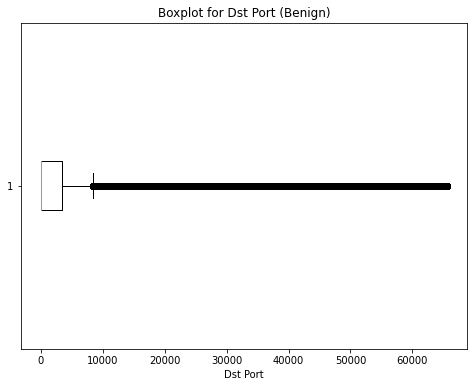

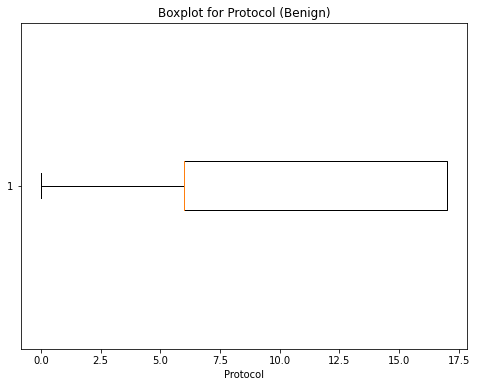

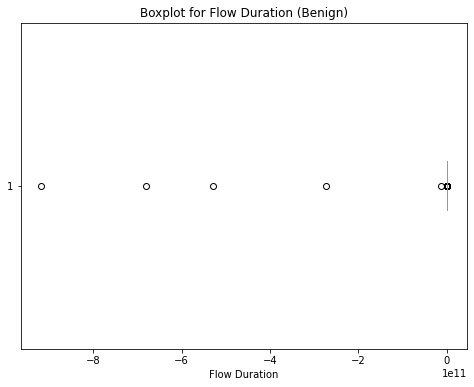

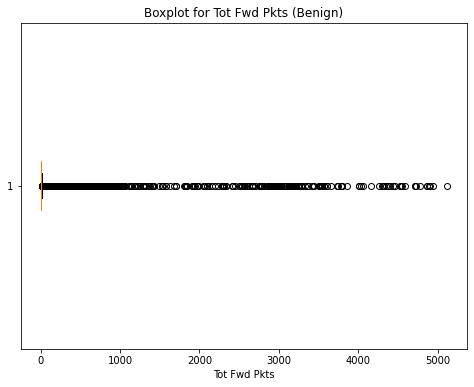

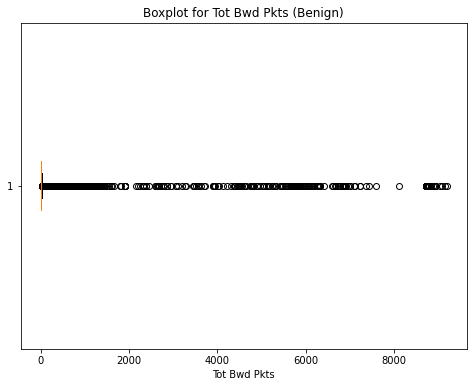

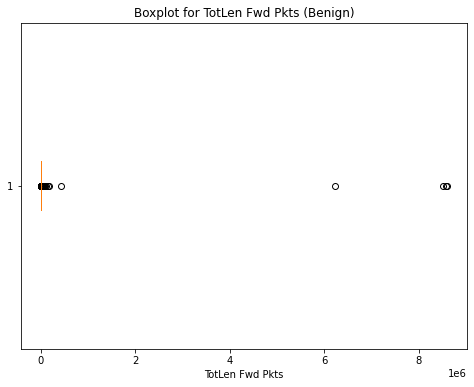

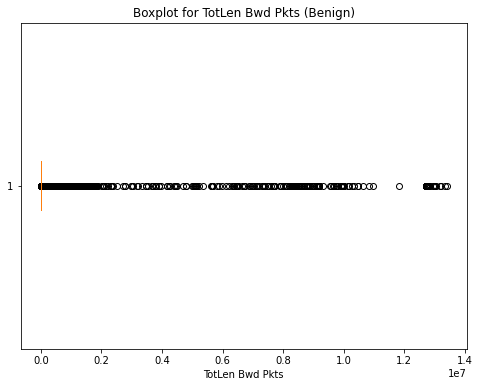

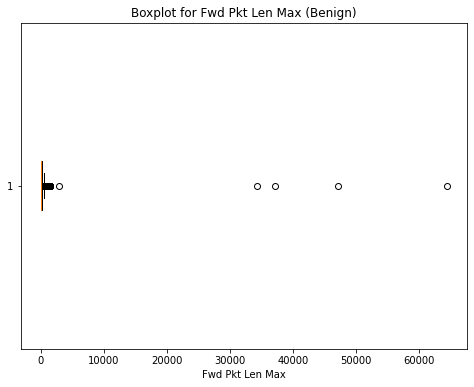

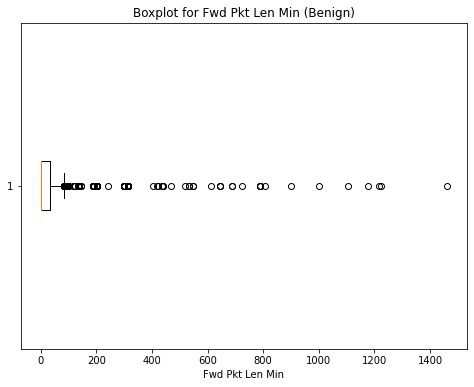

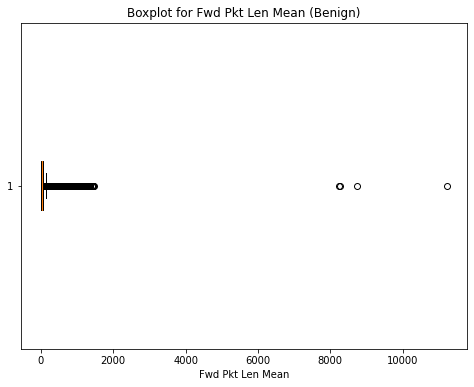

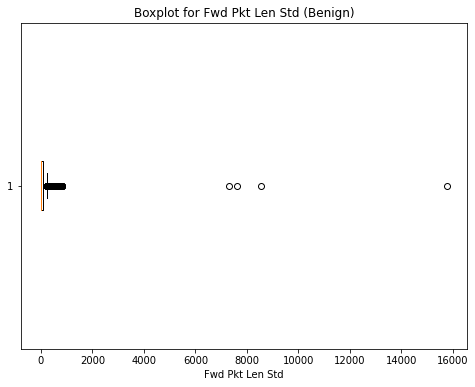

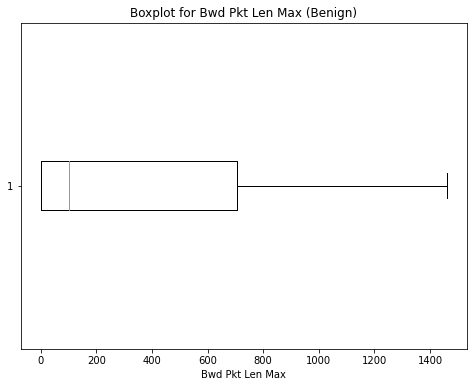

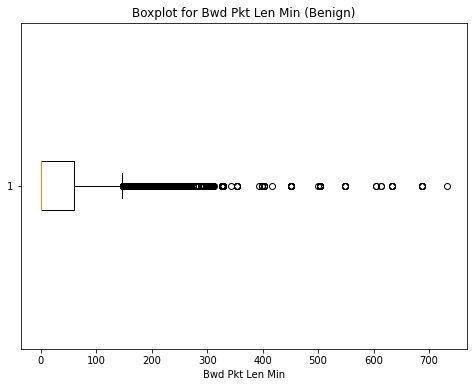

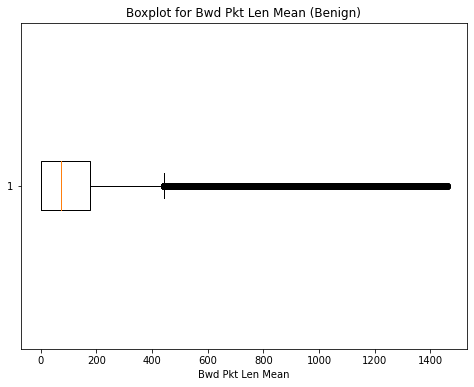

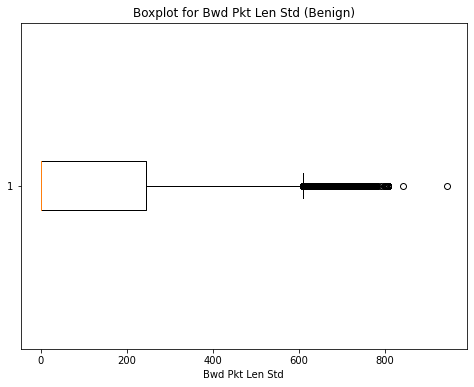

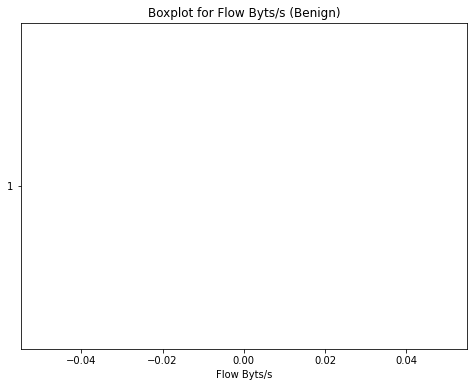

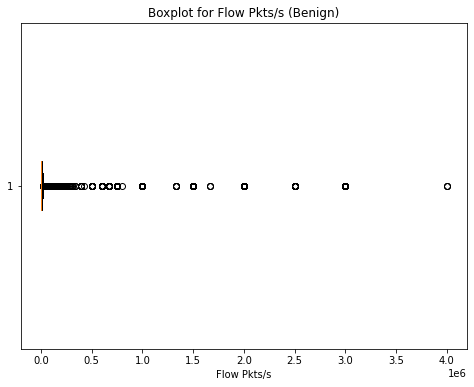

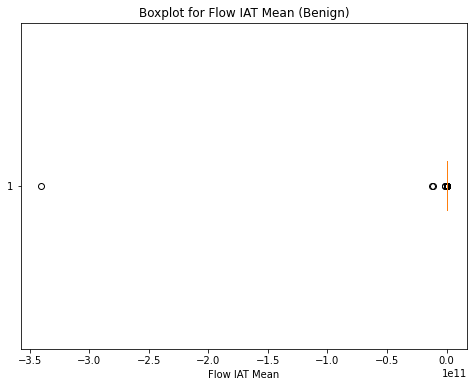

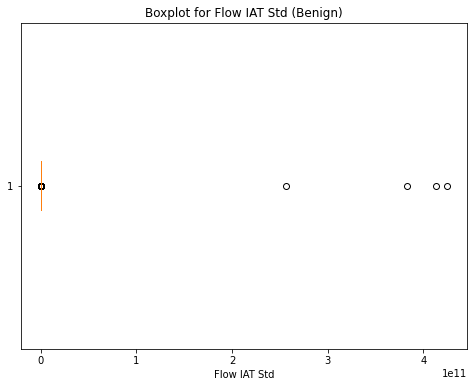

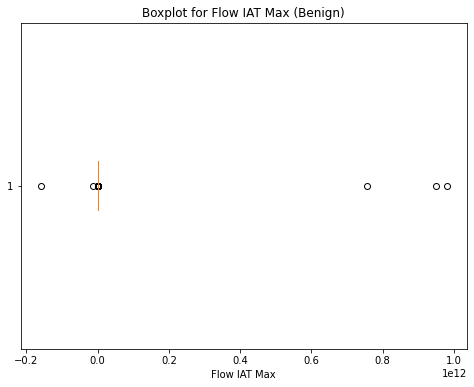

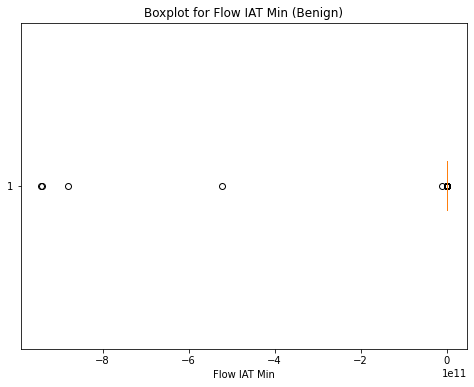

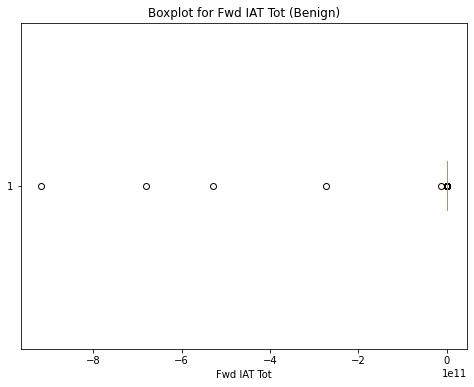

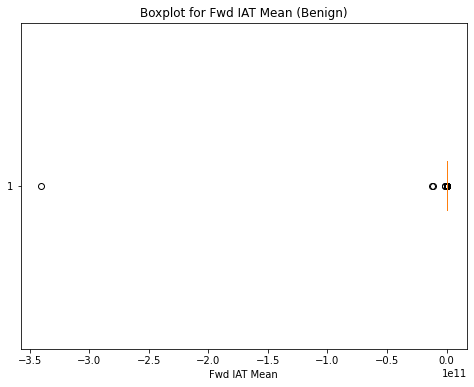

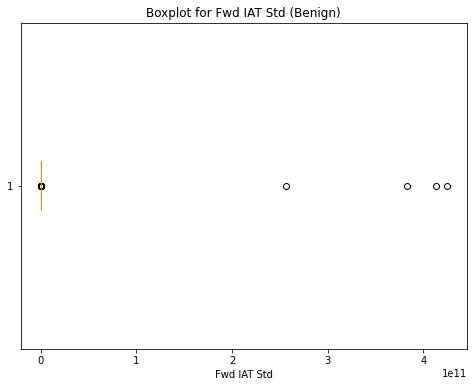

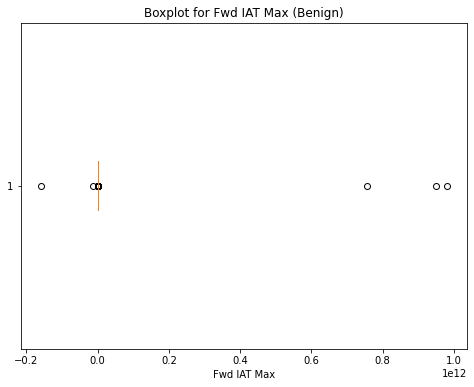

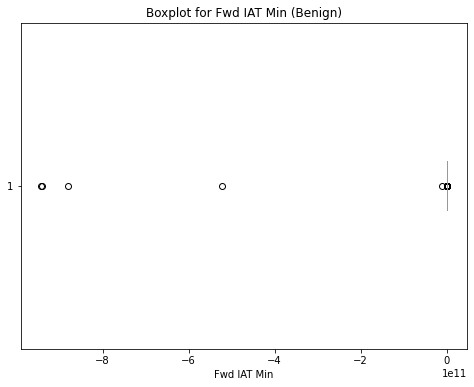

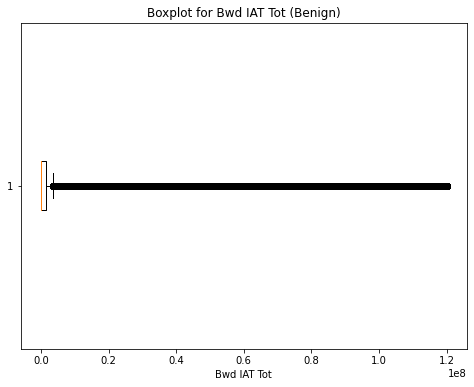

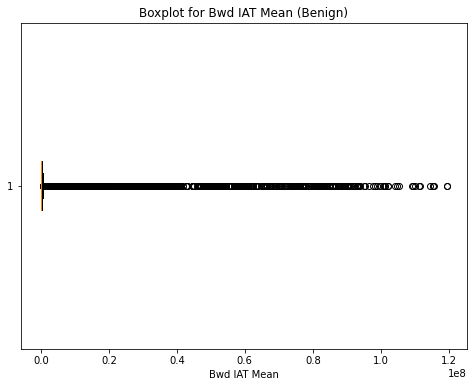

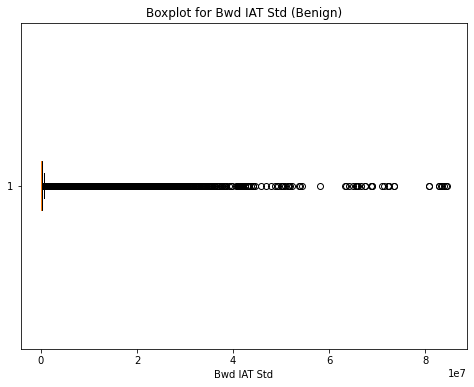

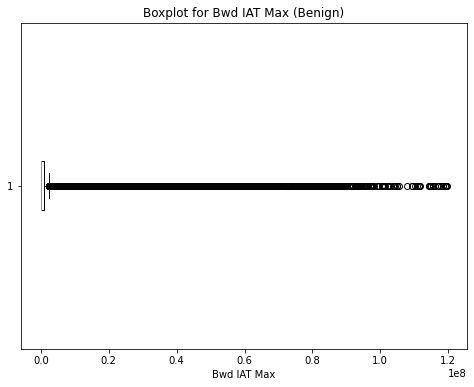

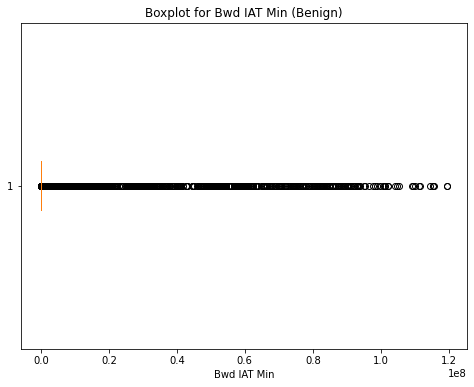

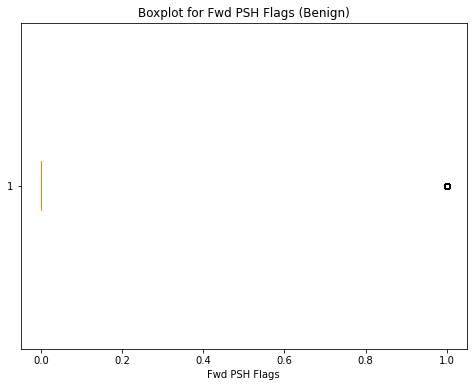

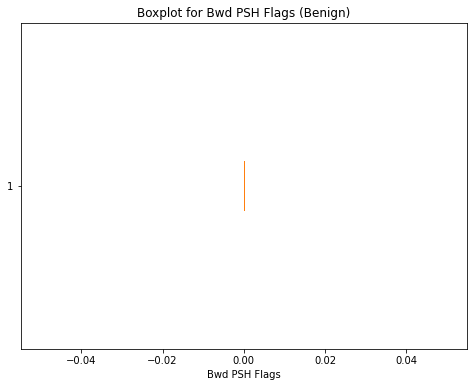

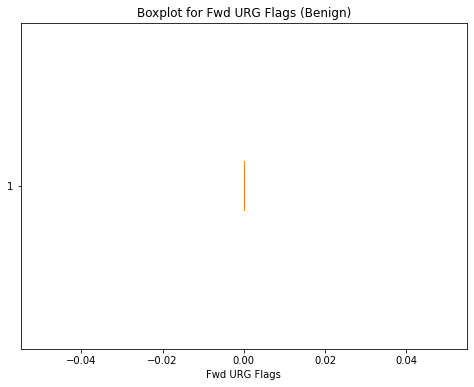

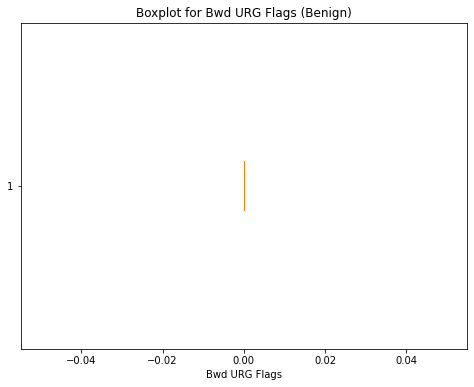

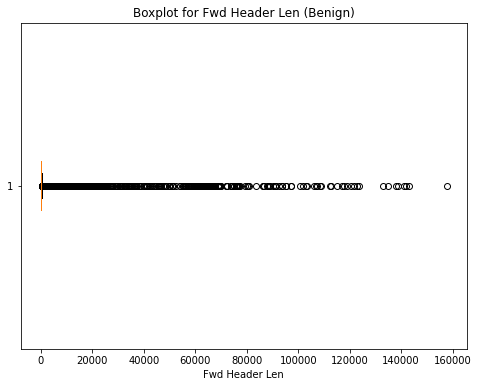

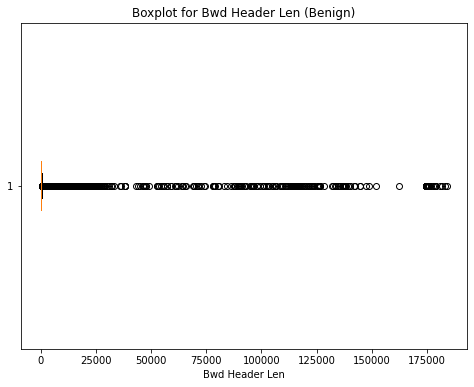

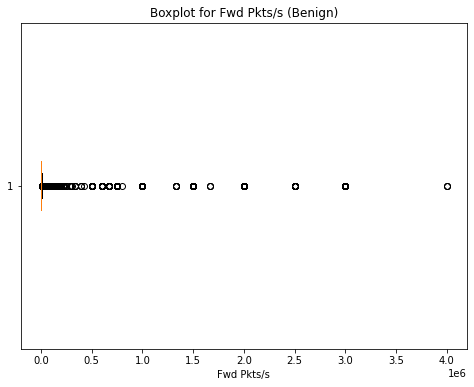

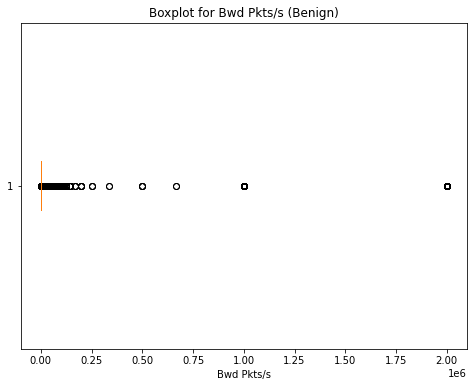

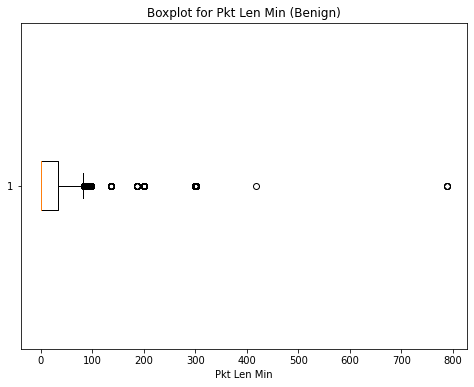

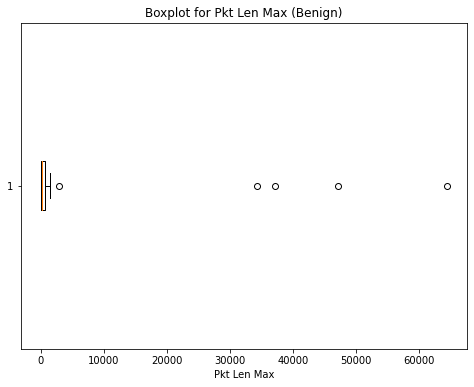

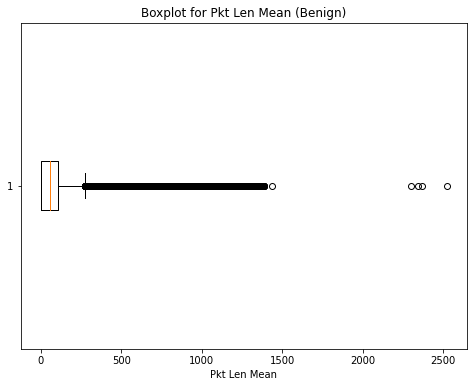

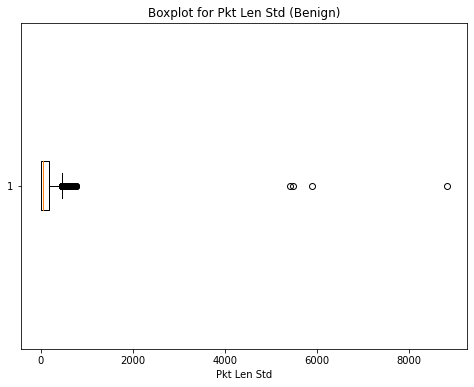

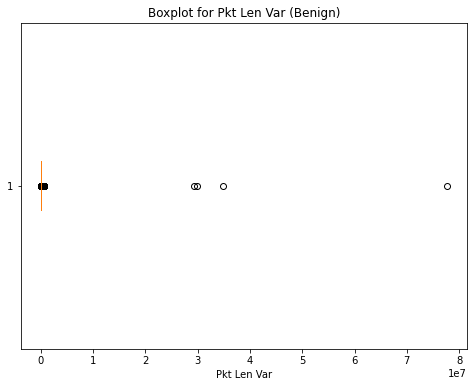

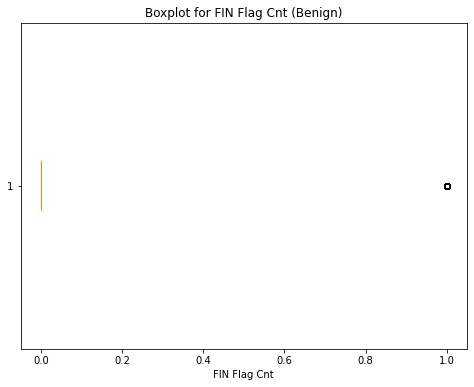

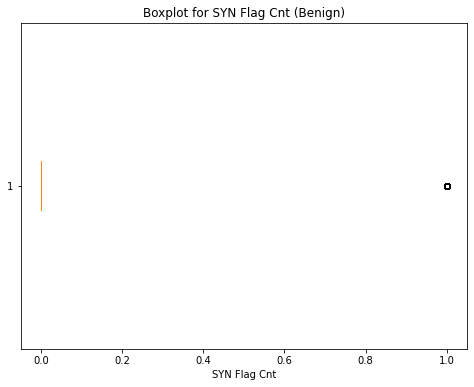

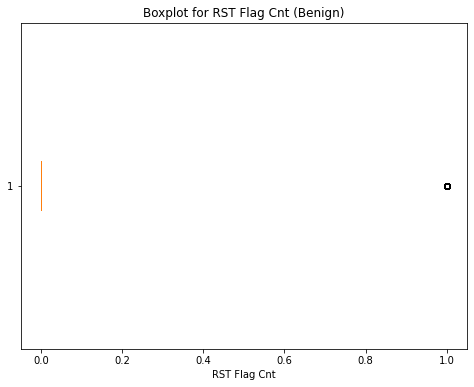

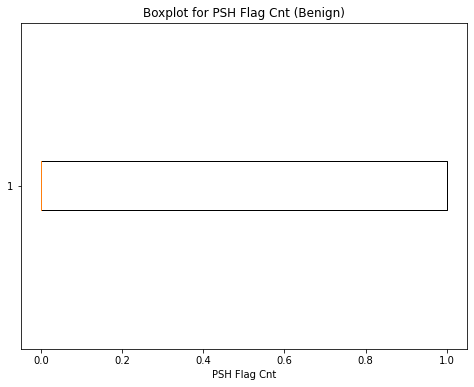

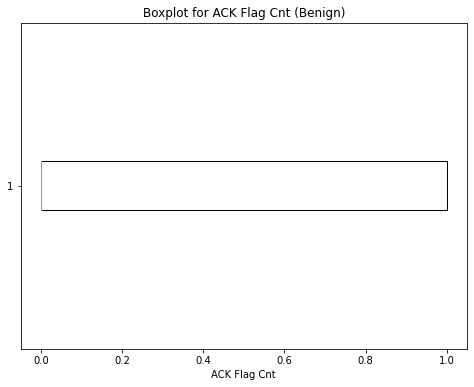

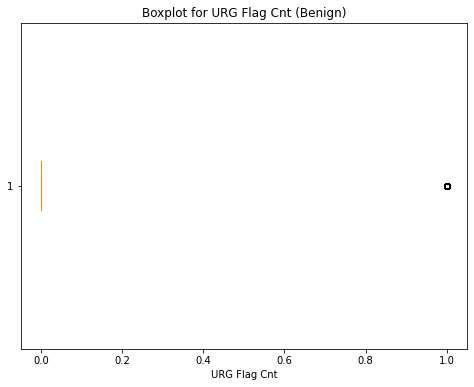

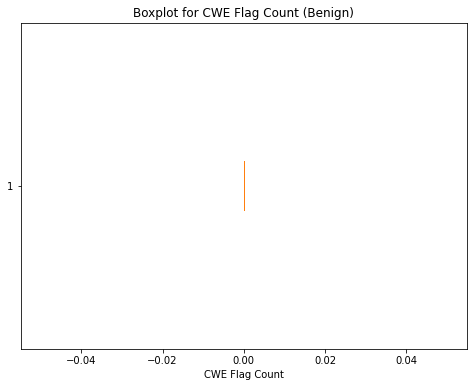

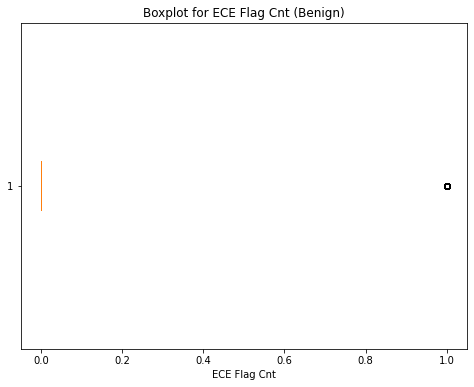

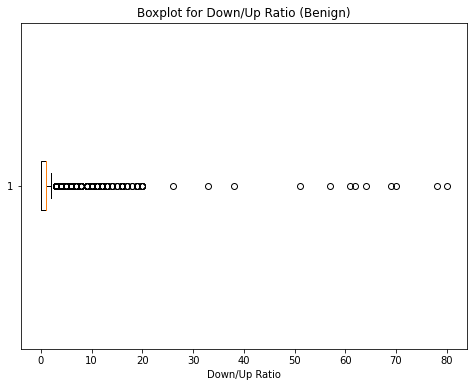

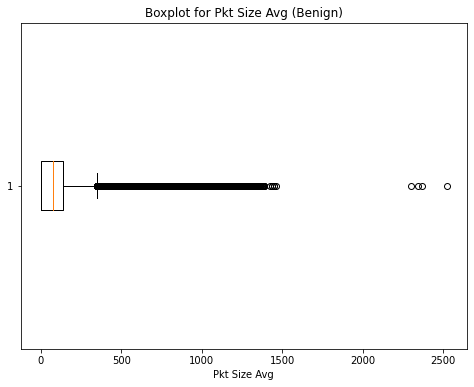

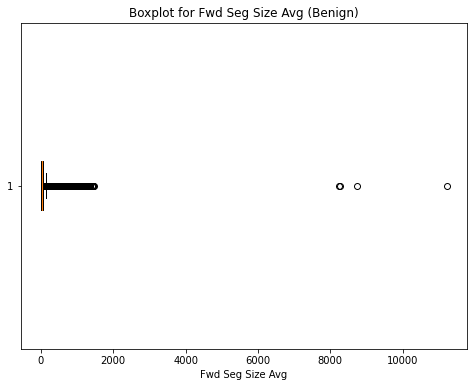

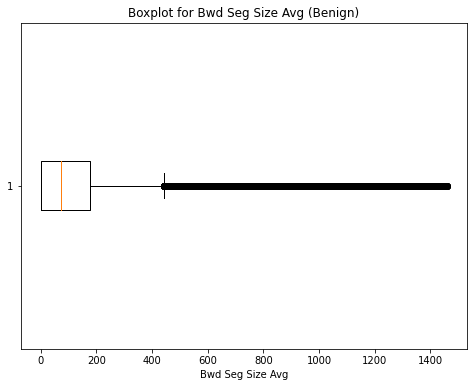

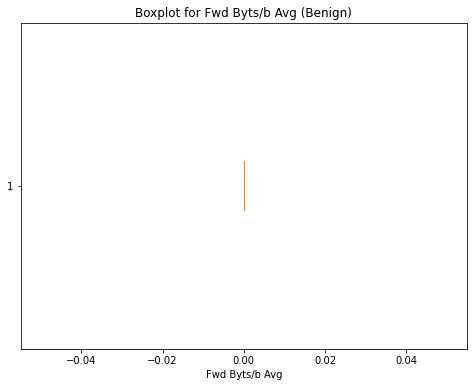

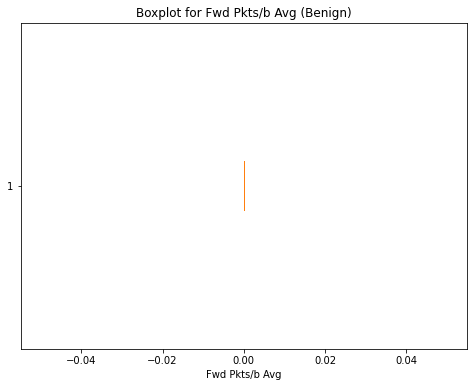

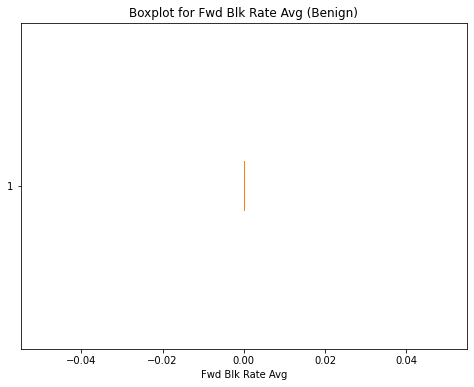

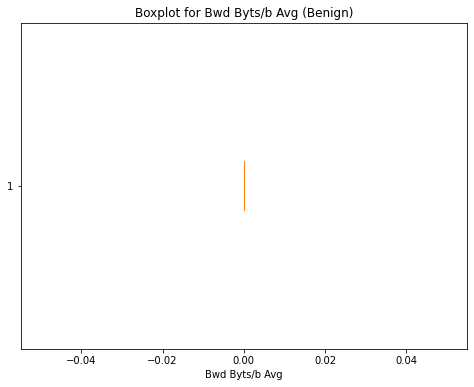

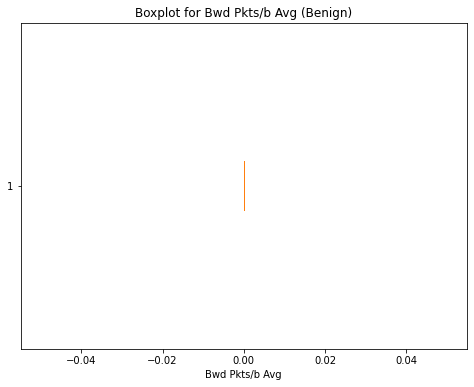

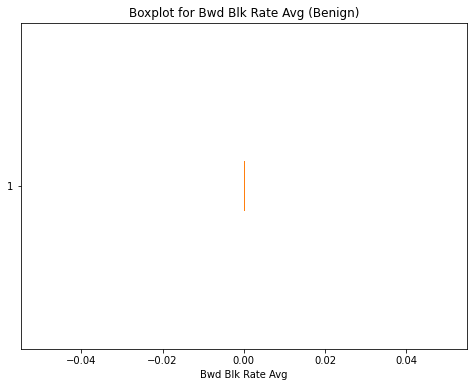

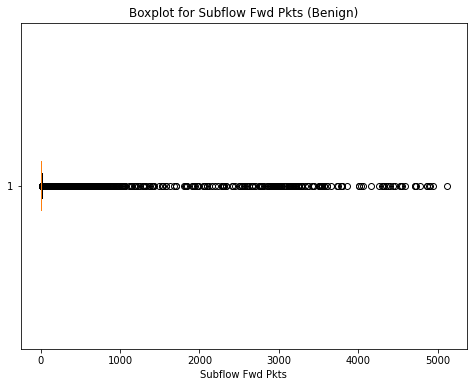

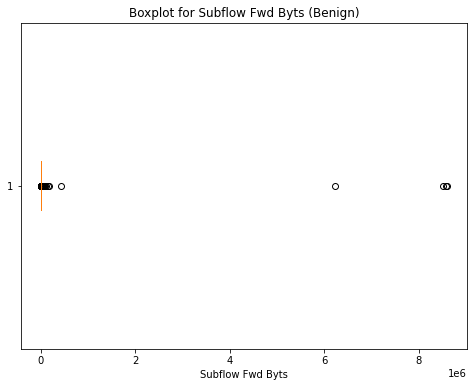

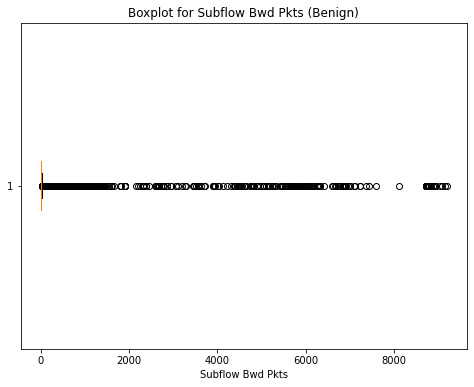

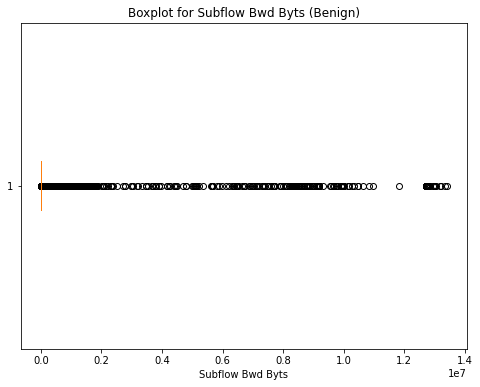

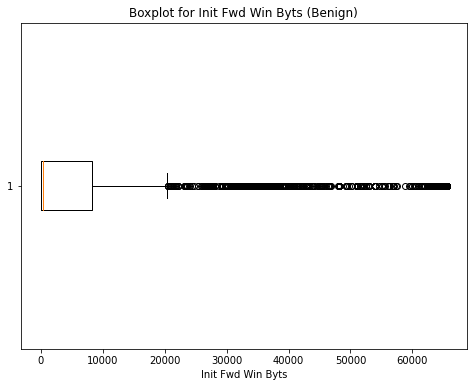

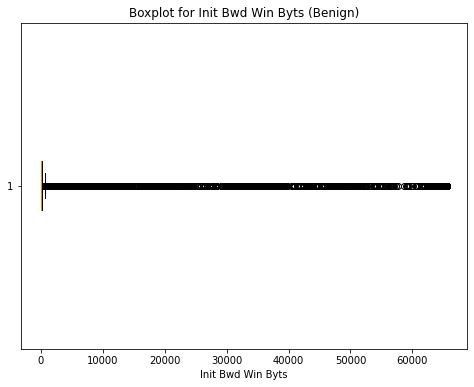

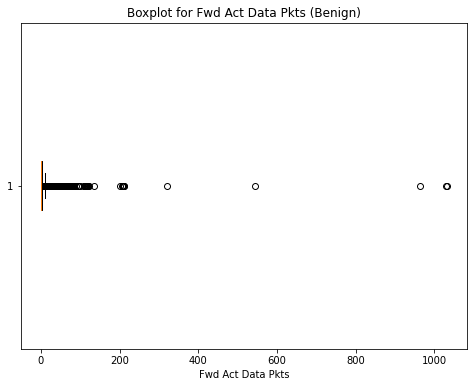

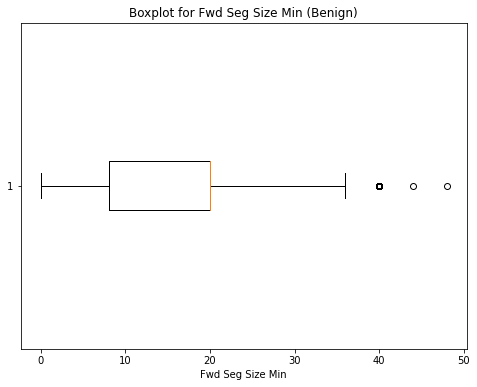

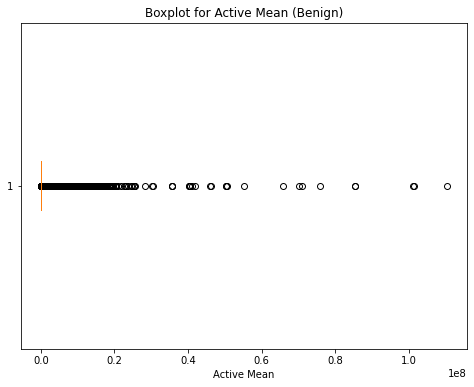

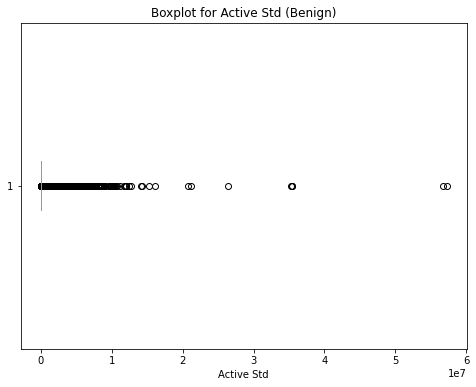

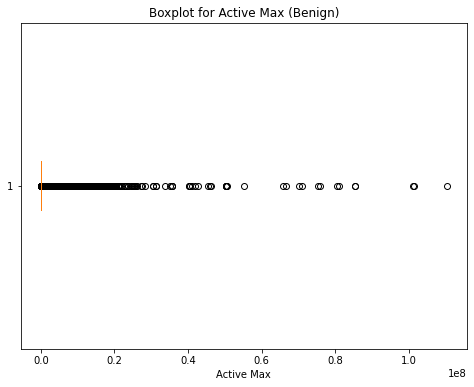

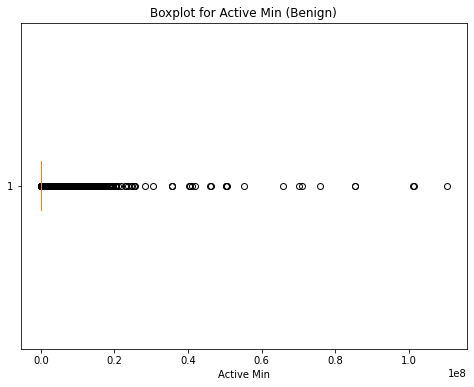

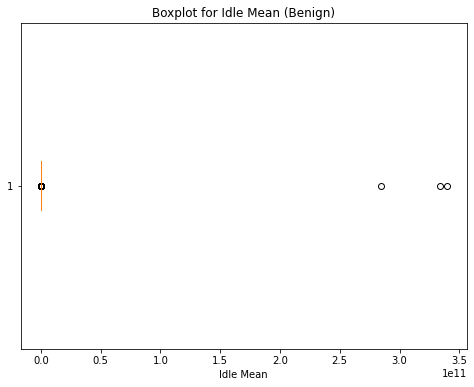

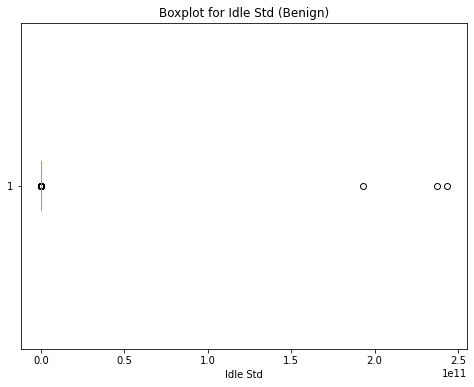

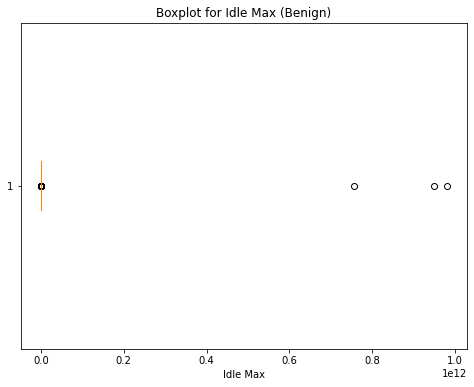

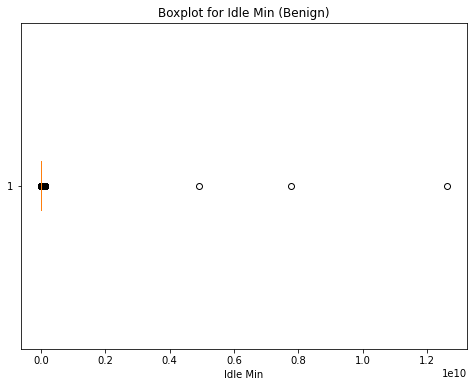

In [14]:
# Boxplot
for feature in numeric_features:
    plt.figure(figsize=(8,6))
    plt.boxplot(benign_data[feature], vert=False)
    plt.title(f"Boxplot for {feature} (Benign)")
    plt.xlabel(feature)
    plt.show()

**NOTE:**

- At this point there are quiet a few outliers for some of the features. Domain Knowledge would help here to understand these in more detail.

- For now I am aware of them and will revisit this later in the project.

##### Scatter Plots

There would be alot of combinations of scatter plots if I look at each pair, 3,101. So at this time I have just completed one. Later I may look at pairs. 

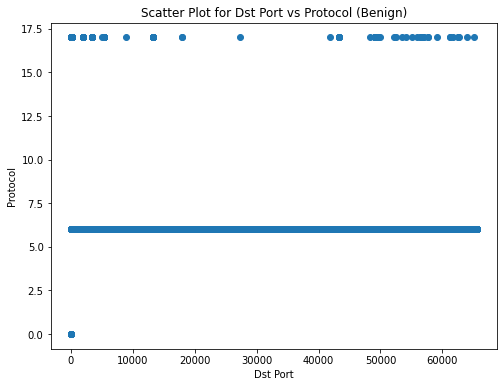

In [15]:
# Scatter looking at pairs of numeric features
if len(numeric_features) >=2:
    feature1, feature2 = numeric_features[:2]
    plt.figure(figsize=(8,6))
    plt.scatter(benign_data[feature1], benign_data[feature2])
    plt.title(f"Scatter Plot for {feature1} vs {feature2} (Benign)")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

#### Statistical Methods

In [16]:
# Which labels are in the data_1 data.
data_1["Label"].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

In [17]:
# Get jsut numeric columns
numeric_features = data_1.select_dtypes(include=[float, int])

# Caculate the mean and standard deviation
means = numeric_features.mean()
st_dev = numeric_features.std()

# Calculate the z scores
z_scores = (numeric_features - means) / st_dev

# Analyse the Z scores with a threshold of 3
z_score_threshold = 3
outliers = z_scores.abs() > z_score_threshold

# Print all the outputs
pd.set_option("display.max_rows", None)

# Print
print("Number of outliers per feature:")
print(outliers.sum())

Number of outliers per feature:
Dst Port             86876
Protocol                 0
Flow Duration            5
Tot Fwd Pkts          1103
Tot Bwd Pkts          1094
TotLen Fwd Pkts         14
TotLen Bwd Pkts       1032
Fwd Pkt Len Max       6407
Fwd Pkt Len Min       6505
Fwd Pkt Len Mean      9269
Fwd Pkt Len Std       8397
Bwd Pkt Len Max          0
Bwd Pkt Len Min      27336
Bwd Pkt Len Mean     25466
Bwd Pkt Len Std      12436
Flow Byts/s              0
Flow Pkts/s              0
Flow IAT Mean            4
Flow IAT Std             4
Flow IAT Max             5
Flow IAT Min             5
Fwd IAT Tot              5
Fwd IAT Mean             4
Fwd IAT Std              4
Fwd IAT Max              5
Fwd IAT Min              5
Bwd IAT Tot          40677
Bwd IAT Mean         20725
Bwd IAT Std          16874
Bwd IAT Max          19455
Bwd IAT Min           3002
Fwd PSH Flags        27886
Bwd PSH Flags            0
Fwd URG Flags            0
Bwd URG Flags            0
Fwd Header Len         

In [18]:
# Print the data points and there z scores for each of the features
# print("\n Data points and their z-scores:")
# print(z_scores[outliers])
## Not working. Running into memory issue

# Save to file instead
outliers_data = z_scores[outliers]
outliers_data.to_csv("z_scores_outliers.csv")

In [19]:
# Read the csv file
outliers_data = pd.read_csv("z_scores_outliers.csv", index_col=0)

**NOTE:**
    
    - Some of the features above have a large amount of outliers from over the threshold score but its hard to know at this point how important this is. For now we will leave it.
    - I may come back to this later.

---

## **Check each dataset have the same feature names**

In [20]:
# Use data_1 as the reference for feature names. Create a list of feature names
reference_columns = list(data_1.columns)

# Use a flag to indicate if all the Datasets have the same feature names
all_datasets_have_same_features = True

# Loop though and check
for i in range(2, 11):
    current_cloumns = list(locals()[f"data_{i}"].columns)
                                    
    if current_cloumns != reference_columns:
        all_datastes_have_same_features =False
        break
        
# Print Results
if all_datasets_have_same_features:
    print("All datasets have the same feature names.")
else:
    print("Not all datasets have the same features names.")

All datasets have the same feature names.


I found later that while they all had the same feature names, some had additional features.

In [21]:
# All the datsets
data_frames = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10]

column_sets = [set(df.columns) for df in data_frames]
common_columns = set.intersection(*column_sets)

# Find any addtional features
additional_columns_by_dataset = [col_set - common_columns for col_set in column_sets]
additional_columns_by_dataset

[set(),
 set(),
 set(),
 {'Dst IP', 'Flow ID', 'Src IP', 'Src Port'},
 set(),
 set(),
 set(),
 set(),
 set(),
 set()]

So, Only the data_4 has addtional features. These features are addtional metadata features so we will be deleting those later in its section.


**HOWEVER:**

Will the datasets all have the same features after the Seperate steps below. ??

---

# **Function: Look at Missing Values, Duplicate Rows and Columns**

In [22]:
# Fucntion to include a dashed line to allow easier seperation of sections
def dashed_line():
    print("---------------------------------------------------------")

# Function to check preprocessing steps
def explore_data(data, data_name):
    
    # Extact the name of the dataset
    name, day_number = data_name.split("_")
    name = name.replace("_", "")
    
    print(f"\033[1mReport for Day {day_number}\033[0m")
    print("\n")
    dashed_line()
    print("\n")
    
    ############################
    ##### MISSING VALUES #######
    ############################
    
    print("\033[1mMissing Values\033[0m")
    
    # Check if missing values.
    data_missing_value_count = data.isnull().sum().sum()
    print(f"Missing values count:", data_missing_value_count)
    
    # What percentage is this?
    data_total_rows = data.shape[0]
    print(f"Total rows:", data_total_rows)

    data_missing_percentage = (data_missing_value_count / (data_total_rows * data.shape[1])) * 100
    print(f"Missing percentage:", data_missing_percentage)
    
    print("\n")
    
    # which columns have the missing values
    data_columns_with_missing_values = data.columns[data.isnull().any()]
    
    # Add in expection if there is no missing values (some of the datasets are not missing any data)
    if not data_columns_with_missing_values.empty:
        print(f"Which columns have missing values:", data_columns_with_missing_values[0])
    else:
        print("No columns have missing values.")
    
    print("\n")
    dashed_line()
    print("\n")
    
    ############################
    ##### DUPLICATE ROWS #####
    ############################
    
    print("\033[1mDuplicate Values\033[0m")
    
    # Check if duplicate values.
    data_duplicate_value_count = data.duplicated().sum()
    print(f"Duplicate values count:", data_duplicate_value_count)
    
    # What percentage is this?
    data_total_rows = data.shape[0]
    print(f"Duplicate percentage:", data_total_rows)
    
    data_duplicate_percentage = ((data_duplicate_value_count +1) / data_total_rows) * 100
    print(f"Missing percentage:", data_duplicate_percentage)
    
    print("\n")
    
    # Columns that have duplicate values
    data_columns_with_duplicate_values = data.columns[data.duplicated().any()]
    if data_columns_with_duplicate_values.size >0:
        print(f"Which columns have duplicate values:", data_columns_with_duplicate_values[0])
    else:
        print("No columns have duplicate values")
    
    # Group the data by the Label column
    duplicate_counts_per_label = data[data.duplicated()].groupby("Label").size()
    
    # Total count of rows for each label
    total_rows_per_label = data.groupby("Label").size()
    
    # Percentages
    duplicate_percetange_per_label = (duplicate_counts_per_label / total_rows_per_label) * 100

    print("\n")
    
    # Print the distribution of duplicates across different labels
    print("\033[1mDistribution of duplicates and their percentages across different labels:\033[0m\n" )
    print(pd.concat([duplicate_counts_per_label, duplicate_percentage_per_label], 
                 axis=1, keys=["Duplicate Count", "Duplicate Percentage"]))
    
    print("\n")
    dashed_line()
    print("\n")
    
    ############################
    ##### DUPLICATE COLUMNS ####
    ############################
    
    print("\033[1mDuplicate Columns\033[0m")
    
    # Empty Dictionary to store Duplicate Columns
    duplicate_columns = {}

    # Iterate though the columns to see if any are duplicates. This should take some time.
    for i, col1 in enumerate(data.columns):
        for j, col2 in enumerate(data.columns[i+1:], i+1):
            if data[col1].equals(data[col2]):
                duplicate_columns[col1] = col2

    # Print the duplicate pairs if any
    for col1, col2 in duplicate_columns.items():
        print(f"Column '{col1}' is a dupliate of '{col2}'.")
    
    print("\n")
    dashed_line()
    print("\n")

---

# **Preprocessing Steps:Perform actions**

## **Day 1**

In [23]:
# Use the function to explore missing values, duplicates rows and columns
explore_data(data_1, "data_1")

Report for Day 1


---------------------------------------------------------


Missing Values
Missing values count: 2277
Total rows: 1048575
Missing percentage: 0.0027143981117230525


Which columns have missing values: Flow Byts/s


---------------------------------------------------------


Duplicate Values
Duplicate values count: 225628
Duplicate percentage: 1048575
Missing percentage: 21.517678754500157


Which columns have duplicate values: ['Dst Port' 'Protocol' 'Timestamp' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Byts/s'
 'Flow Pkts/s' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max'
 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max'
 'Bwd IAT Min' 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags'
 

In [24]:
# Create a working copy of the data_1 dataset
data_1_processed = data_1

### Removing Missing Values

In [25]:
# drop the missing values
data_1_processed = data_1_processed.dropna().reset_index(drop=True)

---

### Remove Duplicate Rows

After investigating we will not drop the duplicate rows for now. As they could be showing either a baseline Benign pattern or an attack pattern.

---

### Remove Duplicate columns

Only some of the duplicates are duplicates across all ten datasets so we will not remove them.

---

### Remove the wrong "label" if it exists

This was seen in the "Jupyter Notebook 1 - EDA - First Exploration on data" that there were some labels that were wrongly labelled with "label".

In [26]:
# Check if this is one of the datasets with the wrong label in the Label column
label_occurrences = ((data_1_processed["Label"] == "label") | (data_1_processed["Label"] == "Label")).sum()
label_occurrences 

0

There are zero occurrences in this dataset. 

---

### Drop Metadata columns

Research during the Leature Review Section has showed that leaving in metadata features in models can lead to models that perform too well.

In [27]:
# List of the meta data columns
metadata_columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP']

---

### Infinity Values

There are Infinity Values. I do not want to drop these columns because these count be important columns.

First. Which columns have Infinity values.

In [28]:
# numeric columns
data_1_numeric_columns = data_1_processed.select_dtypes(include="number")

# then check which columns have infinite values
columns_with_inf = data_1_numeric_columns.columns[data_1_numeric_columns.apply(lambda x: np.isinf(x)).any()]

columns_with_inf

Index(['Flow Byts/s', 'Flow Pkts/s'], dtype='object')

#### Flow Byts/s Infinity Values

For the first dataset there are two columns that have Infinity Values. Flow Byts/s is very important as the majority of attacks are DoS and this can mean overloading a connection with data. The INF are for very large connections so we do not want to lose these features.

In [29]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_1_processed["Flow Byts/s"])
inf_count = inf_mask.sum()
inf_count

1547

There are 1,547 instances of INF values in the Flow Byts/s feature.

How are these distributed across the labels?

In [30]:
# how many of the INF values are in each Label.
inf_values_df = data_1_processed[data_1_processed["Flow Byts/s"] == np.inf]
inf_counts_by_label = inf_values_df.groupby("Label").size()
print("Distribution of INF Values Across the Label Column:")
print(inf_counts_by_label)

Distribution of INF Values Across the Label Column:
Label
Benign    1547
dtype: int64


Interesting, I might have expected the INF values to be in the Attack label.

What is the max value in the Flow Byts/s feature?

In [31]:
# What is the highest value before "inf"
filtered_column= data_1_processed["Flow Byts/s"][data_1_processed["Flow Byts/s"] !=np.inf]

highest_value_flow_byts = filtered_column.max()
print("The highest value before INF is: ", highest_value_flow_byts)

The highest value before INF is:  445250000.0


In [32]:
# How many instances of 445250000.0 are there?
count_445250000 = (data_1_processed["Flow Byts/s"] == 445250000.0).sum()
print("Number of values with the value 445250000.0 in 'Flow Byts/s': ",  count_445250000)

Number of values with the value 445250000.0 in 'Flow Byts/s':  1


In [33]:
# Which Label is the max value in?
filtered_df = data_1_processed[data_1_processed["Flow Byts/s"] == 445250000.0]
label_distribution = filtered_df["Label"].value_counts()
print("Distribution of values 445250000.0 across the 'Label' feature:", label_distribution)

Distribution of values 445250000.0 across the 'Label' feature: Benign    1
Name: Label, dtype: int64


I had thought that the highest value may have been in the Attack column and there there would be more than one since this might be the highest Byts sent.

After exploring the data some more, the INF values do not look like out of range values given that there is only one instances of the highest value. These INF could be Measurements errors, missing values or data export or import issues. Give these and the above, the values will be deleted so we do not lose the "Flow Bytes" feature.

Also, these INF instances are only 0.15% of the total data. So a small amount to lose.

##### Delete INF values in Flow Byts/s

In [34]:
# Delete the INF values in Flow Byts/s
data_1_processed = data_1_processed[data_1_processed["Flow Byts/s"] != np.inf]

#### Flow Pkts/s Infinity Values

In [35]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_1_processed["Flow Pkts/s"])
inf_count = inf_mask.sum()
inf_count

0

The INF values were the same for both features so there are no more to remove. Normalization will work now.

---

### Normalization

In [36]:
# select only the numeric columns
numeric_columns = data_1_processed.select_dtypes(include=[np.number]).columns

# create a scaler
scaler = MinMaxScaler()

# Transform the numeric columns
data_1_processed[numeric_columns] = scaler.fit_transform(data_1_processed[numeric_columns].values)

In [37]:
# Look at the max values to see if Normalization worked
max_values = data_1_processed[numeric_columns].max()
print("Max Values in Numeric Columns:")
print(max_values)

Max Values in Numeric Columns:
Dst Port             1.0
Protocol             1.0
Flow Duration        1.0
Tot Fwd Pkts         1.0
Tot Bwd Pkts         1.0
TotLen Fwd Pkts      1.0
TotLen Bwd Pkts      1.0
Fwd Pkt Len Max      1.0
Fwd Pkt Len Min      1.0
Fwd Pkt Len Mean     1.0
Fwd Pkt Len Std      1.0
Bwd Pkt Len Max      1.0
Bwd Pkt Len Min      1.0
Bwd Pkt Len Mean     1.0
Bwd Pkt Len Std      1.0
Flow Byts/s          1.0
Flow Pkts/s          1.0
Flow IAT Mean        1.0
Flow IAT Std         1.0
Flow IAT Max         1.0
Flow IAT Min         1.0
Fwd IAT Tot          1.0
Fwd IAT Mean         1.0
Fwd IAT Std          1.0
Fwd IAT Max          1.0
Fwd IAT Min          1.0
Bwd IAT Tot          1.0
Bwd IAT Mean         1.0
Bwd IAT Std          1.0
Bwd IAT Max          1.0
Bwd IAT Min          1.0
Fwd PSH Flags        1.0
Bwd PSH Flags        0.0
Fwd URG Flags        0.0
Bwd URG Flags        0.0
Fwd Header Len       1.0
Bwd Header Len       1.0
Fwd Pkts/s           1.0
Bwd Pkts/s         

---

### Convert Label column to a numeric value

In [38]:
# Change the Labels to numeric values.
data_1_processed["Label"] = data_1_processed["Label"].map({"Benign":0, "FTP-BruteForce":1, "SSH-Bruteforce":1 })

---

### Convert the timestamp to a datetime format

In [39]:
# Change the timestamp feature to a datetime object
data_1_processed["Timestamp"] = pd.to_datetime(data_1_processed["Timestamp"])

---

### Optimise the objects to reduce file size

In [40]:
# Create a function to run though each object and automatically pick the right object size.
def optimize_dataframe_memory(data):
    data_optimized = data.copy()

    for col in data_optimized.columns:
        col_dtype = data_optimized[col].dtype

        # Check if the column data type is numeric
        if np.issubdtype(col_dtype, np.number):
            # Get the minimum and maximum values in the column
            min_val = data_optimized[col].min()
            max_val = data_optimized[col].max()

            # Determine the optimal data type based on the range of values
            if np.iinfo(np.int8).min <= min_val <= max_val <= np.iinfo(np.int8).max:
                data_optimized[col] = data_optimized[col].astype('int8')
            elif np.iinfo(np.int16).min <= min_val <= max_val <= np.iinfo(np.int16).max:
                data_optimized[col] = data_optimized[col].astype('int16')
            elif np.iinfo(np.int32).min <= min_val <= max_val <= np.iinfo(np.int32).max:
                data_optimized[col] = data_optimized[col].astype('int32')
            elif np.iinfo(np.int64).min <= min_val <= max_val <= np.iinfo(np.int64).max:
                data_optimized[col] = data_optimized[col].astype('int64')
            elif np.finfo(np.float32).min <= min_val <= max_val <= np.finfo(np.float32).max:
                data_optimized[col] = data_optimized[col].astype('float32')
            else:
                data_optimized[col] = data_optimized[col].astype('float64')

    return data_optimized

In [41]:
# run the function again
data_1_processed = optimize_dataframe_memory(data_1_processed)

In [42]:
# Compare the changes to the different object types
original_info = data_1.info()
optimized_info = data_1_processed.info()

# Get memory usage in bytes
original_memory_usage = data_1.memory_usage(deep=True).sum()
optimized_memory_usage = data_1_processed.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

This time the file size has been reduced to only 79.7Mb. 10% of the original file size.

---

### Change the file to a Parquet File

This will allow models to dun faster.

In [43]:
# Save the file
data_1_processed.to_parquet("data_1_processed.parquet")

In [44]:
# How big is the new file.
file_path = 'data_1_processed.parquet'
file_size = os.path.getsize(file_path)

print(f"The size of the Parquet file is: {file_size} bytes")

The size of the Parquet file is: 6831627 bytes


The file is only 6.48Mb.

---

## **Day 2**

In [45]:
# Use the function to explore missing values, duplicates rows and columns
explore_data(data_2, "data_2")

Report for Day 2


---------------------------------------------------------


Missing Values
Missing values count: 4921
Total rows: 1048575
Missing percentage: 0.005866294733328565


Which columns have missing values: Flow Byts/s


---------------------------------------------------------


Duplicate Values
Duplicate values count: 2421
Duplicate percentage: 1048575
Missing percentage: 0.2309801397134206


Which columns have duplicate values: ['Dst Port' 'Protocol' 'Timestamp' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Byts/s'
 'Flow Pkts/s' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max'
 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max'
 'Bwd IAT Min' 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags'
 'Bw

In [46]:
# Create a working copy of data_2 dataset
data_2_processed = data_2

---

### Removing Missing Values

In [47]:
# drop the missing values
data_2_processed = data_2_processed.dropna().reset_index(drop=True)

---

### Remove Duplicate Rows

After investigating we will not drop the duplicate rows for now. As they could be showing either a baseline Benign pattern or an attack pattern.

---

### Remove Duplicate columns

Only some of the duplicates are duplicates across all ten datasets so we will not remove them.

---

### Remove the wrong "label" if it exists

This was seen in the "Jupyter Notebook 1 - EDA - First Exploration on data" that there were some labels that were wrongly labelled with "label".

In [48]:
# Check if this is one of the datasets with the wrong label in the Label column
label_occurrences = ((data_2_processed["Label"] == "label") | (data_2_processed["Label"] == "Label")).sum()
label_occurrences 

0

There are zero occurrences in this dataset. 

---

### Drop Metadata columns

Research during the Leature Review Section has showed that leaving in metadata features in models can lead to models that perform too well.

In [49]:
# List of the meta data columns
metadata_columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP']

---

### Infinity Values

There are Infinity Values. I do not want to drop these columns because these count be important columns.

First. Which columns have Infinity values.

In [50]:
# numeric columns
data_2_numeric_columns = data_2_processed.select_dtypes(include="number")

# then check which columns have infinite values
columns_with_inf = data_2_numeric_columns.columns[data_2_numeric_columns.apply(lambda x: np.isinf(x)).any()]

columns_with_inf

Index(['Flow Byts/s', 'Flow Pkts/s'], dtype='object')

---

#### Flow Byts/s Infinity Values

In [51]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_2_processed["Flow Byts/s"])
inf_count = inf_mask.sum()
inf_count

3106

There are 3,106 instances of INF values in the Flow Byts/s feature.

How are these distributed across the labels?

In [52]:
# how many of the INF values are in each Label.
inf_values_df = data_2_processed[data_2_processed["Flow Byts/s"] == np.inf]
inf_counts_by_label = inf_values_df.groupby("Label").size()
print("Distribution of INF Values Across the Label Column:")
print(inf_counts_by_label)

Distribution of INF Values Across the Label Column:
Label
Benign    3106
dtype: int64


In [53]:
# What is the highest value before "inf"
filtered_column= data_2_processed["Flow Byts/s"][data_2_processed["Flow Byts/s"] !=np.inf]

highest_value_flow_byts = filtered_column.max()
print("The highest value before INF is: ", highest_value_flow_byts)

The highest value before INF is:  1298500000.0


In [54]:
# How many instances of 1298500000 are there?
count_1298500000 = (data_2_processed["Flow Byts/s"] ==1298500000.0).sum()
print("Number of values with the value 1298500000.0 in 'Flow Byts/s': ",  count_1298500000)

Number of values with the value 1298500000.0 in 'Flow Byts/s':  1


In [55]:
# Delete the INF values in Flow Byts/s
data_2_processed = data_2_processed[data_2_processed["Flow Byts/s"] != np.inf]

#### Flow Pkts/s Infinity Values

In [56]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_2_processed["Flow Pkts/s"])
inf_count = inf_mask.sum()
inf_count

0

The INF values were the same for both features so there are no more to remove. Normalization will work now.

---

### Normalization

In [57]:
# select only the numeric columns
numeric_columns = data_2_processed.select_dtypes(include=[np.number]).columns

# create a scaler
scaler = MinMaxScaler()

# Transform the numeric columns
data_2_processed[numeric_columns] = scaler.fit_transform(data_2_processed[numeric_columns].values)

In [58]:
# Look at the max values to see if Normalization worked
max_values = data_2_processed[numeric_columns].max()
print("Max Values in Numeric Columns:")
print(max_values)

Max Values in Numeric Columns:
Dst Port             1.0
Protocol             1.0
Flow Duration        1.0
Tot Fwd Pkts         1.0
Tot Bwd Pkts         1.0
TotLen Fwd Pkts      1.0
TotLen Bwd Pkts      1.0
Fwd Pkt Len Max      1.0
Fwd Pkt Len Min      1.0
Fwd Pkt Len Mean     1.0
Fwd Pkt Len Std      1.0
Bwd Pkt Len Max      1.0
Bwd Pkt Len Min      1.0
Bwd Pkt Len Mean     1.0
Bwd Pkt Len Std      1.0
Flow Byts/s          1.0
Flow Pkts/s          1.0
Flow IAT Mean        1.0
Flow IAT Std         1.0
Flow IAT Max         1.0
Flow IAT Min         1.0
Fwd IAT Tot          1.0
Fwd IAT Mean         1.0
Fwd IAT Std          1.0
Fwd IAT Max          1.0
Fwd IAT Min          1.0
Bwd IAT Tot          1.0
Bwd IAT Mean         1.0
Bwd IAT Std          1.0
Bwd IAT Max          1.0
Bwd IAT Min          1.0
Fwd PSH Flags        1.0
Bwd PSH Flags        0.0
Fwd URG Flags        0.0
Bwd URG Flags        0.0
Fwd Header Len       1.0
Bwd Header Len       1.0
Fwd Pkts/s           1.0
Bwd Pkts/s         

---

### Convert Label column to a numeric value

In [59]:
data_2_processed["Label"].unique()

array(['Benign', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris'],
      dtype=object)

In [60]:
# Change the Labels to numeric values.
data_2_processed["Label"] = data_2_processed["Label"].map({"Benign":0, "DoS attacks-GoldenEye":1, "DoS attacks-Slowloris":1 })

---

### Convert the timestamp to a datetime format

In [61]:
# Change the timestamp feature to a datetime object
data_2_processed["Timestamp"] = pd.to_datetime(data_2_processed["Timestamp"])

---

### Optimise the objects 

In [62]:
# run the function again
data_2_processed = optimize_dataframe_memory(data_2_processed)

In [63]:
# Compare the changes to the different object types
original_info = data_2.info()
optimized_info = data_2_processed.info()

# Get memory usage in bytes
original_memory_usage = data_2.memory_usage(deep=True).sum()
optimized_memory_usage = data_2_processed.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

This time the file size has been reduced to only 80.4Mb. 10% of the original file size.

---

### Change the file to a Parquet File

In [64]:
# Save the file
data_2_processed.to_parquet("data_2_processed.parquet")

In [65]:
# How big is the new file.
file_path = 'data_2_processed.parquet'
file_size = os.path.getsize(file_path)

print(f"The size of the Parquet file is: {file_size} bytes")

The size of the Parquet file is: 7431753 bytes


The file is only 7.27Mb.

---

## **Day 3**

In [66]:
# Use the function to explore missing values, duplicates rows and columns
explore_data(data_3, "data_3")

Report for Day 3


---------------------------------------------------------


Missing Values
Missing values count: 0
Total rows: 1048575
Missing percentage: 0.0


No columns have missing values.


---------------------------------------------------------


Duplicate Values
Duplicate values count: 145847
Duplicate percentage: 1048575
Missing percentage: 13.909162434732853


Which columns have duplicate values: ['Dst Port' 'Protocol' 'Timestamp' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Byts/s'
 'Flow Pkts/s' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max'
 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max'
 'Bwd IAT Min' 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags'
 'Bwd URG Flags' 'Fwd Header Len' 'Bw

In [67]:
data_3_processed = data_3

---

### Removing Missing Values

No Missing values.

---

### Remove Duplicate Rows

After investigating we will not drop the duplicate rows for now. As they could be showing either a baseline Benign pattern or an attack pattern.

---

### Remove Duplicate columns

Only some of the duplicates are duplicates across all ten datasets so we will not remove them.

---

### Remove the wrong "label" if it exists

This was seen in the "Jupyter Notebook 1 - EDA - First Exploration on data" that there were some labels that were wrongly labelled with "label".

In [68]:
# Check if this is one of the datasets with the wrong label in the Label column
label_occurrences = ((data_3_processed["Label"] == "label") | (data_3_processed["Label"] == "Label")).sum()
label_occurrences 

1

1 Label. So this needs to be deleted.

In [69]:
# Get the wrong labels
wrong_label = data_3_processed[(data_3_processed["Label"] == "label") | (data_3_processed["Label"] == "Label")].index
# Delete these labels
data_3_processed = data_3_processed.drop(wrong_label)

---

### Drop Metadata columns

Research during the Leature Review Section has showed that leaving in metadata features in models can lead to models that perform too well.

In [70]:
# List of the meta data columns
metadata_columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP']

---

### Infinity Values

There are Infinity Values. I do not want to drop these columns because these count be important columns.

First. Which columns have Infinity values.

In [71]:
# numeric columns
data_3_numeric_columns = data_3_processed.select_dtypes(include="number")

# then check which columns have infinite values
columns_with_inf = data_3_numeric_columns.columns[data_3_numeric_columns.apply(lambda x: np.isinf(x)).any()]

columns_with_inf

Index([], dtype='object')

All the columns are "object". This is an issue. Change them

In [72]:
# whcih columsn to covert. Don't change Timestamp or Label.
columns_to_convert = [col for col in data_3_processed.columns if col not in ["Timestamp", "Label"]]

# Convert numeric types with errors=coerce
data_3_processed[columns_to_convert] = data_3_processed[columns_to_convert].apply(pd.to_numeric, errors='coerce')

#### Run again

In [73]:
# numeric columns
data_3_numeric_columns = data_3_processed.select_dtypes(include="number")

# then check which columns have infinite values
columns_with_inf = data_3_numeric_columns.columns[data_3_numeric_columns.apply(lambda x: np.isinf(x)).any()]

columns_with_inf

Index([], dtype='object')

No Infinity values in data_3.

---

### Normalization

In [74]:

data_3_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048574 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048574 non-null  int64  
 1   Protocol           1048574 non-null  int64  
 2   Timestamp          1048574 non-null  object 
 3   Flow Duration      1048574 non-null  int64  
 4   Tot Fwd Pkts       1048574 non-null  int64  
 5   Tot Bwd Pkts       1048574 non-null  int64  
 6   TotLen Fwd Pkts    1048574 non-null  int64  
 7   TotLen Bwd Pkts    1048574 non-null  int64  
 8   Fwd Pkt Len Max    1048574 non-null  int64  
 9   Fwd Pkt Len Min    1048574 non-null  int64  
 10  Fwd Pkt Len Mean   1048574 non-null  float64
 11  Fwd Pkt Len Std    1048574 non-null  float64
 12  Bwd Pkt Len Max    1048574 non-null  int64  
 13  Bwd Pkt Len Min    1048574 non-null  int64  
 14  Bwd Pkt Len Mean   1048574 non-null  float64
 15  Bwd Pkt Len Std    1048574 non-n

In [75]:
# select only the numeric columns
numeric_columns = data_3_processed.select_dtypes(include=[np.number]).columns

# create a scaler
scaler = MinMaxScaler()

# Transform the numeric columns
data_3_processed[numeric_columns] = scaler.fit_transform(data_3_processed[numeric_columns].values)

In [76]:
# Look at the max values to see if Normalization worked
max_values = data_3_processed[numeric_columns].max()
print("Max Values in Numeric Columns:")
print(max_values)

Max Values in Numeric Columns:
Dst Port             1.0
Protocol             1.0
Flow Duration        1.0
Tot Fwd Pkts         1.0
Tot Bwd Pkts         1.0
TotLen Fwd Pkts      1.0
TotLen Bwd Pkts      1.0
Fwd Pkt Len Max      1.0
Fwd Pkt Len Min      1.0
Fwd Pkt Len Mean     1.0
Fwd Pkt Len Std      1.0
Bwd Pkt Len Max      1.0
Bwd Pkt Len Min      1.0
Bwd Pkt Len Mean     1.0
Bwd Pkt Len Std      1.0
Flow Byts/s          1.0
Flow Pkts/s          1.0
Flow IAT Mean        1.0
Flow IAT Std         1.0
Flow IAT Max         1.0
Flow IAT Min         1.0
Fwd IAT Tot          1.0
Fwd IAT Mean         1.0
Fwd IAT Std          1.0
Fwd IAT Max          1.0
Fwd IAT Min          1.0
Bwd IAT Tot          1.0
Bwd IAT Mean         1.0
Bwd IAT Std          1.0
Bwd IAT Max          1.0
Bwd IAT Min          1.0
Fwd PSH Flags        1.0
Bwd PSH Flags        0.0
Fwd URG Flags        0.0
Bwd URG Flags        0.0
Fwd Header Len       1.0
Bwd Header Len       1.0
Fwd Pkts/s           1.0
Bwd Pkts/s         

---

### Convert Label column to a numeric value

In [77]:
data_3_processed["Label"].unique()

array(['Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk'],
      dtype=object)

In [78]:
# Change the Labels to numeric values.
data_3_processed["Label"] = data_3_processed["Label"].map({"Benign":0, "DoS attacks-SlowHTTPTest":1, "DoS attacks-Hulk":1 })

---

### Convert the timestamp to a datetime format

In [79]:
# Change the timestamp feature to a datetime object
data_3_processed["Timestamp"] = pd.to_datetime(data_3_processed["Timestamp"])

---

### Optimise the objects 

In [80]:
# run the function again
data_3_processed = optimize_dataframe_memory(data_3_processed)

In [81]:
# Compare the changes to the different object types
original_info = data_3.info()
optimized_info = data_3_processed.info()

# Get memory usage in bytes
original_memory_usage = data_3.memory_usage(deep=True).sum()
optimized_memory_usage = data_3_processed.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Dst Port           1048575 non-null  object
 1   Protocol           1048575 non-null  object
 2   Timestamp          1048575 non-null  object
 3   Flow Duration      1048575 non-null  object
 4   Tot Fwd Pkts       1048575 non-null  object
 5   Tot Bwd Pkts       1048575 non-null  object
 6   TotLen Fwd Pkts    1048575 non-null  object
 7   TotLen Bwd Pkts    1048575 non-null  object
 8   Fwd Pkt Len Max    1048575 non-null  object
 9   Fwd Pkt Len Min    1048575 non-null  object
 10  Fwd Pkt Len Mean   1048575 non-null  object
 11  Fwd Pkt Len Std    1048575 non-null  object
 12  Bwd Pkt Len Max    1048575 non-null  object
 13  Bwd Pkt Len Min    1048575 non-null  object
 14  Bwd Pkt Len Mean   1048575 non-null  object
 15  Bwd Pkt Len Std    1048575 non-null  object
 16  

This time the file size has been reduced to only 102Mb. 10% of the original file size.

---

### Change the file to a Parquet File

In [82]:
# Save the file
data_3_processed.to_parquet("data_3_processed.parquet")

In [83]:
# How big is the new file.
file_path = 'data_3_processed.parquet'
file_size = os.path.getsize(file_path)

print(f"The size of the Parquet file is: {file_size} bytes")

The size of the Parquet file is: 5161698 bytes


The file is only 5.05Mb.

---

## **Day 4**

In [84]:
# Use the function to explore missing values, duplicates rows and columns
explore_data(data_4, "data_4")

Report for Day 4


---------------------------------------------------------


Missing Values
Missing values count: 36767
Total rows: 7948748
Missing percentage: 0.005506557522673771


Which columns have missing values: Flow Byts/s


---------------------------------------------------------


Duplicate Values
Duplicate values count: 2
Duplicate percentage: 7948748
Missing percentage: 3.774179279554466e-05


Which columns have duplicate values: ['Flow ID' 'Src IP' 'Src Port' 'Dst IP' 'Dst Port' 'Protocol' 'Timestamp'
 'Flow Duration' 'Tot Fwd Pkts' 'Tot Bwd Pkts' 'TotLen Fwd Pkts'
 'TotLen Bwd Pkts' 'Fwd Pkt Len Max' 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean'
 'Fwd Pkt Len Std' 'Bwd Pkt Len Max' 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean'
 'Bwd Pkt Len Std' 'Flow Byts/s' 'Flow Pkts/s' 'Flow IAT Mean'
 'Flow IAT Std' 'Flow IAT Max' 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean'
 'Fwd IAT Std' 'Fwd IAT Max' 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean'
 'Bwd IAT Std' 'Bwd IAT Max' 'Bwd IAT Min' 'Fwd PSH Fla

In [85]:
# Create a working copy of data_2 dataset
data_4_processed = data_4

---

### Removing Missing Values

In [86]:
# drop the missing values
data_4_processed = data_4_processed.dropna().reset_index(drop=True)

---

### Remove Duplicate Rows

After investigating we will not drop the duplicate rows for now. As they could be showing either a baseline Benign pattern or an attack pattern.

---

### Remove Duplicate columns

Only some of the duplicates are duplicates across all ten datasets so we will not remove them.

---

### Remove the wrong "label" if it exists

This was seen in the "Jupyter Notebook 1 - EDA - First Exploration on data" that there were some labels that were wrongly labelled with "label".

In [87]:
# Check if this is one of the datasets with the wrong label in the Label column
label_occurrences = ((data_4_processed["Label"] == "label") | (data_4_processed["Label"] == "Label")).sum()
label_occurrences 

0

There are zero occurrences in this dataset. 

---

### Drop Metadata columns

Earlier we saw that dataset 4 has extra features, but these are metadata features and as seen in the report these lead to overfitting and so they will be removed.

In [88]:
# List of the meta data columns
metadata_columns=["Flow ID", "Src IP", "Src Port", "Dst IP"]

In [89]:
# drop these columns
data_4_processed.drop(metadata_columns, axis=1, inplace=True)

---

### Infinity Values

There are Infinity Values. I do not want to drop these columns because these count be important columns.

First. Which columns have Infinity values.

In [90]:
# numeric columns
data_4_numeric_columns = data_4_processed.select_dtypes(include="number")

# then check which columns have infinite values
columns_with_inf = data_4_numeric_columns.columns[data_4_numeric_columns.apply(lambda x: np.isinf(x)).any()]

columns_with_inf

Index(['Flow Byts/s', 'Flow Pkts/s'], dtype='object')

---

#### Flow Byts/s Infinity Values

In [91]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_4_processed["Flow Byts/s"])
inf_count = inf_mask.sum()
inf_count

22686

There are 22,686 instances of INF values in the Flow Byts/s feature. 

This is a larger increase than the first three datasets but this dataset is much larger so this is expected.

How are these distributed across the labels?

In [92]:
# how many of the INF values are in each Label.
inf_values_df = data_4_processed[data_4_processed["Flow Byts/s"] == np.inf]
inf_counts_by_label = inf_values_df.groupby("Label").size()
print("Distribution of INF Values Across the Label Column:")
print(inf_counts_by_label)

Distribution of INF Values Across the Label Column:
Label
Benign    22686
dtype: int64


In [93]:
# Delete the INF values in Flow Byts/s
data_4_processed = data_4_processed[data_4_processed["Flow Byts/s"] != np.inf]

#### Flow Pkts/s Infinity Values

In [94]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_4_processed["Flow Pkts/s"])
inf_count = inf_mask.sum()
inf_count

0

The INF values were the same for both features so there are no more to remove. Normalization will work now.

---

### Normalization

In [95]:
# select only the numeric columns
numeric_columns = data_4_processed.select_dtypes(include=[np.number]).columns

# create a scaler
scaler = MinMaxScaler()

# Transform the numeric columns
data_4_processed[numeric_columns] = scaler.fit_transform(data_4_processed[numeric_columns].values)

In [96]:
# Look at the max values to see if Normalization worked
max_values = data_4_processed[numeric_columns].max()
print("Max Values in Numeric Columns:")
print(max_values)

Max Values in Numeric Columns:
Dst Port             1.0
Protocol             1.0
Flow Duration        1.0
Tot Fwd Pkts         1.0
Tot Bwd Pkts         1.0
TotLen Fwd Pkts      1.0
TotLen Bwd Pkts      1.0
Fwd Pkt Len Max      1.0
Fwd Pkt Len Min      1.0
Fwd Pkt Len Mean     1.0
Fwd Pkt Len Std      1.0
Bwd Pkt Len Max      1.0
Bwd Pkt Len Min      1.0
Bwd Pkt Len Mean     1.0
Bwd Pkt Len Std      1.0
Flow Byts/s          1.0
Flow Pkts/s          1.0
Flow IAT Mean        1.0
Flow IAT Std         1.0
Flow IAT Max         1.0
Flow IAT Min         1.0
Fwd IAT Tot          1.0
Fwd IAT Mean         1.0
Fwd IAT Std          1.0
Fwd IAT Max          1.0
Fwd IAT Min          1.0
Bwd IAT Tot          1.0
Bwd IAT Mean         1.0
Bwd IAT Std          1.0
Bwd IAT Max          1.0
Bwd IAT Min          1.0
Fwd PSH Flags        1.0
Bwd PSH Flags        0.0
Fwd URG Flags        0.0
Bwd URG Flags        0.0
Fwd Header Len       1.0
Bwd Header Len       1.0
Fwd Pkts/s           1.0
Bwd Pkts/s         

---

### Convert Label column to a numeric value

In [97]:
data_4_processed["Label"].unique()

array(['Benign', 'DDoS attacks-LOIC-HTTP'], dtype=object)

In [98]:
# Change the Labels to numeric values.
data_4_processed["Label"] = data_4_processed["Label"].map({"Benign":0, "DDoS attacks-LOIC-HTTP":1 })

---

### Convert the timestamp to a datetime format

In [99]:
# Change the timestamp feature to a datetime object
data_4_processed["Timestamp"] = pd.to_datetime(data_4_processed["Timestamp"])

---

### Optimise the objects 

In [100]:
# run the function again
data_4_processed = optimize_dataframe_memory(data_4_processed)

In [101]:
# Compare the changes to the different object types
original_info = data_4.info()
optimized_info = data_4_processed.info()

# Get memory usage in bytes
original_memory_usage = data_4.memory_usage(deep=True).sum()
optimized_memory_usage = data_4_processed.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948748 entries, 0 to 7948747
Data columns (total 84 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow ID            object 
 1   Src IP             object 
 2   Src Port           int64  
 3   Dst IP             object 
 4   Dst Port           int64  
 5   Protocol           int64  
 6   Timestamp          object 
 7   Flow Duration      int64  
 8   Tot Fwd Pkts       int64  
 9   Tot Bwd Pkts       int64  
 10  TotLen Fwd Pkts    float64
 11  TotLen Bwd Pkts    float64
 12  Fwd Pkt Len Max    float64
 13  Fwd Pkt Len Min    float64
 14  Fwd Pkt Len Mean   float64
 15  Fwd Pkt Len Std    float64
 16  Bwd Pkt Len Max    float64
 17  Bwd Pkt Len Min    float64
 18  Bwd Pkt Len Mean   float64
 19  Bwd Pkt Len Std    float64
 20  Flow Byts/s        float64
 21  Flow Pkts/s        float64
 22  Flow IAT Mean      float64
 23  Flow IAT Std       float64
 24  Flow IAT Max       float64
 25  Flow IAT Min      

This time the file size has been reduced from 4.7Gb to only 767.4Mb.

---

### Change the file to a Parquet File

In [102]:
# Save the file
data_4_processed.to_parquet("data_4_processed.parquet")

In [103]:
# How big is the new file.
file_path = 'data_4_processed.parquet'
file_size = os.path.getsize(file_path)

print(f"The size of the Parquet file is: {file_size} bytes")

The size of the Parquet file is: 53145455 bytes


The file is only 50.6Mb.

---

## **Day 5**

In [104]:
# Use the function to explore missing values, duplicates rows and columns
explore_data(data_5, "data_5")

Report for Day 5


---------------------------------------------------------


Missing Values
Missing values count: 0
Total rows: 1048575
Missing percentage: 0.0


No columns have missing values.


---------------------------------------------------------


Duplicate Values
Duplicate values count: 17557
Duplicate percentage: 1048575
Missing percentage: 1.6744629616384141


Which columns have duplicate values: ['Dst Port' 'Protocol' 'Timestamp' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Byts/s'
 'Flow Pkts/s' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max'
 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max'
 'Bwd IAT Min' 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags'
 'Bwd URG Flags' 'Fwd Header Len' 'Bwd

In [105]:
data_5_processed = data_5

---

### Removing Missing Values

No Missing values.

---

### Remove Duplicate Rows

After investigating we will not drop the duplicate rows for now. As they could be showing either a baseline Benign pattern or an attack pattern.

---

### Remove Duplicate columns

Only some of the duplicates are duplicates across all ten datasets so we will not remove them.

---

### Remove the wrong "label" if it exists

This was seen in the "Jupyter Notebook 1 - EDA - First Exploration on data" that there were some labels that were wrongly labelled with "label".

In [106]:
# Check if this is one of the datasets with the wrong label in the Label column
label_occurrences = ((data_5_processed["Label"] == "label") | (data_5_processed["Label"] == "Label")).sum()
label_occurrences 

0

0 Label. No action needed.

---

### Drop Metadata columns

Dataset 5 does not have these columns so no action needed.

---

### Infinity Values

There are Infinity Values. I do not want to drop these columns because these count be important columns.

First. Which columns have Infinity values.

In [107]:
# numeric columns
data_5_numeric_columns = data_5_processed.select_dtypes(include="number")

# then check which columns have infinite values
columns_with_inf = data_5_numeric_columns.columns[data_5_numeric_columns.apply(lambda x: np.isinf(x)).any()]

columns_with_inf

Index([], dtype='object')

No INF values so no actioned needed.

---

### Normalization

In [108]:
# select only the numeric columns
numeric_columns = data_5_processed.select_dtypes(include=[np.number]).columns

# create a scaler
scaler = MinMaxScaler()

# Transform the numeric columns
data_5_processed[numeric_columns] = scaler.fit_transform(data_5_processed[numeric_columns].values)

In [109]:
# Look at the max values to see if Normalization worked
max_values = data_5_processed[numeric_columns].max()
print("Max Values in Numeric Columns:")
print(max_values)

Max Values in Numeric Columns:
Dst Port             1.0
Protocol             1.0
Flow Duration        1.0
Tot Fwd Pkts         1.0
Tot Bwd Pkts         1.0
TotLen Fwd Pkts      1.0
TotLen Bwd Pkts      1.0
Fwd Pkt Len Max      1.0
Fwd Pkt Len Min      1.0
Fwd Pkt Len Mean     1.0
Fwd Pkt Len Std      1.0
Bwd Pkt Len Max      1.0
Bwd Pkt Len Min      1.0
Bwd Pkt Len Mean     1.0
Bwd Pkt Len Std      1.0
Flow Byts/s          1.0
Flow Pkts/s          1.0
Flow IAT Mean        1.0
Flow IAT Std         1.0
Flow IAT Max         1.0
Flow IAT Min         1.0
Fwd IAT Tot          1.0
Fwd IAT Mean         1.0
Fwd IAT Std          1.0
Fwd IAT Max          1.0
Fwd IAT Min          1.0
Bwd IAT Tot          1.0
Bwd IAT Mean         1.0
Bwd IAT Std          1.0
Bwd IAT Max          1.0
Bwd IAT Min          1.0
Fwd PSH Flags        1.0
Bwd PSH Flags        0.0
Fwd URG Flags        0.0
Bwd URG Flags        0.0
Fwd Header Len       1.0
Bwd Header Len       1.0
Fwd Pkts/s           1.0
Bwd Pkts/s         

---

### Convert Label column to a numeric value

In [110]:
data_5_processed["Label"].unique()

array(['Benign', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'], dtype=object)

In [111]:
# Change the Labels to numeric values.
data_5_processed["Label"] = data_5_processed["Label"].map({"Benign":0, "DDOS attack-LOIC-UDP":1, "DDOS attack-HOIC":1 })

---

### Convert the timestamp to a datetime format

In [112]:
# Change the timestamp feature to a datetime object
data_5_processed["Timestamp"] = pd.to_datetime(data_5_processed["Timestamp"])

---

### Optimise the objects 

In [113]:
# run the function again
data_5_processed = optimize_dataframe_memory(data_5_processed)

In [114]:
# Compare the changes to the different object types
original_info = data_5.info()
optimized_info = data_5_processed.info()

# Get memory usage in bytes
original_memory_usage = data_5.memory_usage(deep=True).sum()
optimized_memory_usage = data_5_processed.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Dst Port           1048575 non-null  float64       
 1   Protocol           1048575 non-null  float64       
 2   Timestamp          1048575 non-null  datetime64[ns]
 3   Flow Duration      1048575 non-null  float64       
 4   Tot Fwd Pkts       1048575 non-null  float64       
 5   Tot Bwd Pkts       1048575 non-null  float64       
 6   TotLen Fwd Pkts    1048575 non-null  float64       
 7   TotLen Bwd Pkts    1048575 non-null  float64       
 8   Fwd Pkt Len Max    1048575 non-null  float64       
 9   Fwd Pkt Len Min    1048575 non-null  float64       
 10  Fwd Pkt Len Mean   1048575 non-null  float64       
 11  Fwd Pkt Len Std    1048575 non-null  float64       
 12  Bwd Pkt Len Max    1048575 non-null  float64       
 13  Bwd Pkt Len Min    1048575 

This time the file size has been reduced to only 87Mb.

---

### Change the file to a Parquet File

In [115]:
# Save the file
data_5_processed.to_parquet("data_5_processed.parquet")

In [116]:
# How big is the new file.
file_path = 'data_5_processed.parquet'
file_size = os.path.getsize(file_path)

print(f"The size of the Parquet file is: {file_size} bytes")

The size of the Parquet file is: 956284 bytes


The file is only 9.56Mb.

---

## **Day 6** 

In [117]:
# Use the function to explore missing values, duplicates rows and columns
explore_data(data_6, "data_6")

Report for Day 6


---------------------------------------------------------


Missing Values
Missing values count: 3569
Total rows: 1048575
Missing percentage: 0.00425458360155449


Which columns have missing values: Flow Byts/s


---------------------------------------------------------


Duplicate Values
Duplicate values count: 3278
Duplicate percentage: 1048575
Missing percentage: 0.31271010657320647


Which columns have duplicate values: ['Dst Port' 'Protocol' 'Timestamp' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Byts/s'
 'Flow Pkts/s' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max'
 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max'
 'Bwd IAT Min' 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags'
 'Bw

In [118]:
data_6_processed = data_6

In [119]:
# whcih columsn to covert. Don't change Timestamp or Label.
columns_to_convert = [col for col in data_6_processed.columns if col not in ["Timestamp", "Label"]]

# Convert numeric types with errors=coerce
data_6_processed[columns_to_convert] = data_6_processed[columns_to_convert].apply(pd.to_numeric, errors='coerce')

---

### Removing Missing Values

In [120]:
# drop the missing values
data_6_processed = data_6_processed.dropna().reset_index(drop=True)

---

### Remove Duplicate Rows

After investigating we will not drop the duplicate rows for now. As they could be showing either a baseline Benign pattern or an attack pattern.

---

### Remove Duplicate columns

Only some of the duplicates are duplicates across all ten datasets so we will not remove them.

---

### Remove the wrong "label" if it exists

This was seen in the "Jupyter Notebook 1 - EDA - First Exploration on data" that there were some labels that were wrongly labelled with "label".

In [121]:
# Check if this is one of the datasets with the wrong label in the Label column
label_occurrences = ((data_6_processed["Label"] == "label") | (data_6_processed["Label"] == "Label")).sum()
label_occurrences 

0

No action needed.

---

### Drop Metadata columns

This dataset does not have these columns.

---

### Infinity Values

There are Infinity Values. I do not want to drop these columns because these count be important columns.

First. Which columns have Infinity values.

In [122]:
# numeric columns
data_6_numeric_columns = data_6_processed.select_dtypes(include="number")

# then check which columns have infinite values
columns_with_inf = data_6_numeric_columns.columns[data_6_numeric_columns.apply(lambda x: np.isinf(x)).any()]

columns_with_inf

Index(['Flow Byts/s', 'Flow Pkts/s'], dtype='object')

---

#### Flow Byts/s Infinity Values

In [123]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_6_processed["Flow Byts/s"])
inf_count = inf_mask.sum()
inf_count

2041

There are 2,041 instances of INF values in the Flow Byts/s feature. 

How are these distributed across the labels?

In [124]:
# how many of the INF values are in each Label.
inf_values_df = data_6_processed[data_6_processed["Flow Byts/s"] == np.inf]
inf_counts_by_label = inf_values_df.groupby("Label").size()
print("Distribution of INF Values Across the Label Column:")
print(inf_counts_by_label)

Distribution of INF Values Across the Label Column:
Label
Benign    2041
dtype: int64


In [125]:
# Delete the INF values in Flow Byts/s
data_6_processed = data_6_processed[data_6_processed["Flow Byts/s"] != np.inf]

#### Flow Pkts/s Infinity Values

In [126]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_6_processed["Flow Pkts/s"])
inf_count = inf_mask.sum()
inf_count

0

The INF values were the same for both features so there are no more to remove. Normalization will work now.

---

### Normalization

In [127]:
# select only the numeric columns
numeric_columns = data_6_processed.select_dtypes(include=[np.number]).columns

# create a scaler
scaler = MinMaxScaler()

# Transform the numeric columns
data_6_processed[numeric_columns] = scaler.fit_transform(data_6_processed[numeric_columns].values)

In [128]:
# Look at the max values to see if Normalization worked
max_values = data_6_processed[numeric_columns].max()
print("Max Values in Numeric Columns:")
print(max_values)

Max Values in Numeric Columns:
Dst Port             1.0
Protocol             1.0
Flow Duration        1.0
Tot Fwd Pkts         1.0
Tot Bwd Pkts         1.0
TotLen Fwd Pkts      1.0
TotLen Bwd Pkts      1.0
Fwd Pkt Len Max      1.0
Fwd Pkt Len Min      1.0
Fwd Pkt Len Mean     1.0
Fwd Pkt Len Std      1.0
Bwd Pkt Len Max      1.0
Bwd Pkt Len Min      1.0
Bwd Pkt Len Mean     1.0
Bwd Pkt Len Std      1.0
Flow Byts/s          1.0
Flow Pkts/s          1.0
Flow IAT Mean        1.0
Flow IAT Std         1.0
Flow IAT Max         1.0
Flow IAT Min         1.0
Fwd IAT Tot          1.0
Fwd IAT Mean         1.0
Fwd IAT Std          1.0
Fwd IAT Max          1.0
Fwd IAT Min          1.0
Bwd IAT Tot          1.0
Bwd IAT Mean         1.0
Bwd IAT Std          1.0
Bwd IAT Max          1.0
Bwd IAT Min          1.0
Fwd PSH Flags        1.0
Bwd PSH Flags        0.0
Fwd URG Flags        0.0
Bwd URG Flags        0.0
Fwd Header Len       1.0
Bwd Header Len       1.0
Fwd Pkts/s           1.0
Bwd Pkts/s         

---

### Convert Label column to a numeric value

In [129]:
data_6_processed["Label"].unique()

array(['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'],
      dtype=object)

In [130]:
# Change the Labels to numeric values.
data_6_processed["Label"] = data_6_processed["Label"].map({"Benign":0, 
                                                           "Brute Force -XSS":1, 
                                                           "SQL Injection":1,
                                                          "Brute Force -Web":1})

---

### Convert the timestamp to a datetime format

In [131]:
# Change the timestamp feature to a datetime object
data_6_processed["Timestamp"] = pd.to_datetime(data_6_processed["Timestamp"])

---

### Optimise the objects 

In [132]:
# run the function again
data_6_processed = optimize_dataframe_memory(data_6_processed)

In [133]:
# Compare the changes to the different object types
original_info = data_6.info()
optimized_info = data_6_processed.info()

# Get memory usage in bytes
original_memory_usage = data_6.memory_usage(deep=True).sum()
optimized_memory_usage = data_6_processed.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

This time the file size has been reduced to only 94.5Mb.

---

### Change the file to a Parquet File

In [134]:
# Save the file
data_6_processed.to_parquet("data_6_processed.parquet")

In [135]:
# How big is the new file.
file_path = 'data_3_processed.parquet'
file_size = os.path.getsize(file_path)

print(f"The size of the Parquet file is: {file_size} bytes")

The size of the Parquet file is: 5161698 bytes


The file is only 5.05Mb.

---

## **Day 7**

In [136]:
# Use the function to explore missing values, duplicates rows and columns
explore_data(data_7, "data_7")

Report for Day 7


---------------------------------------------------------


Missing Values
Missing values count: 3754
Total rows: 1048575
Missing percentage: 0.004475120997544286


Which columns have missing values: Flow Byts/s


---------------------------------------------------------


Duplicate Values
Duplicate values count: 2614
Duplicate percentage: 1048575
Missing percentage: 0.2493860715733257


Which columns have duplicate values: ['Dst Port' 'Protocol' 'Timestamp' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Byts/s'
 'Flow Pkts/s' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max'
 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max'
 'Bwd IAT Min' 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags'
 'Bw

In [137]:
# Create a working copy of data_2 dataset
data_7_processed = data_7

---

### Removing Missing Values

In [138]:
# drop the missing values
data_7_processed = data_7_processed.dropna().reset_index(drop=True)

---

### Remove Duplicate Rows

After investigating we will not drop the duplicate rows for now. As they could be showing either a baseline Benign pattern or an attack pattern.

---

### Remove Duplicate columns

Only some of the duplicates are duplicates across all ten datasets so we will not remove them.

---

### Remove the wrong "label" if it exists

This was seen in the "Jupyter Notebook 1 - EDA - First Exploration on data" that there were some labels that were wrongly labelled with "label".

In [139]:
# Check if this is one of the datasets with the wrong label in the Label column
label_occurrences = ((data_7_processed["Label"] == "label") | (data_7_processed["Label"] == "Label")).sum()
label_occurrences 

0

There are zero occurrences in this dataset. 

---

### Drop Metadata columns

Not in this dataset

---

### Infinity Values

There are Infinity Values. I do not want to drop these columns because these count be important columns.

First. Which columns have Infinity values.

In [140]:
# numeric columns
data_7_numeric_columns = data_7_processed.select_dtypes(include="number")

# then check which columns have infinite values
columns_with_inf = data_7_numeric_columns.columns[data_7_numeric_columns.apply(lambda x: np.isinf(x)).any()]

columns_with_inf

Index(['Flow Byts/s', 'Flow Pkts/s'], dtype='object')

---

#### Flow Byts/s Infinity Values

In [141]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_7_processed["Flow Byts/s"])
inf_count = inf_mask.sum()
inf_count

1954

There are 1,954 instances of INF values in the Flow Byts/s feature.

How are these distributed across the labels?

In [142]:
# how many of the INF values are in each Label.
inf_values_df = data_7_processed[data_7_processed["Flow Byts/s"] == np.inf]
inf_counts_by_label = inf_values_df.groupby("Label").size()
print("Distribution of INF Values Across the Label Column:")
print(inf_counts_by_label)

Distribution of INF Values Across the Label Column:
Label
Benign    1954
dtype: int64


In [143]:
# Delete the INF values in Flow Byts/s
data_7_processed = data_7_processed[data_7_processed["Flow Byts/s"] != np.inf]

#### Flow Pkts/s Infinity Values

In [144]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_7_processed["Flow Pkts/s"])
inf_count = inf_mask.sum()
inf_count

0

The INF values were the same for both features so there are no more to remove. Normalization will work now.

---

### Normalization

In [145]:
# select only the numeric columns
numeric_columns = data_7_processed.select_dtypes(include=[np.number]).columns

# create a scaler
scaler = MinMaxScaler()

# Transform the numeric columns
data_7_processed[numeric_columns] = scaler.fit_transform(data_7_processed[numeric_columns].values)

In [146]:
# Look at the max values to see if Normalization worked
max_values = data_7_processed[numeric_columns].max()
print("Max Values in Numeric Columns:")
print(max_values)

Max Values in Numeric Columns:
Dst Port             1.0
Protocol             1.0
Flow Duration        1.0
Tot Fwd Pkts         1.0
Tot Bwd Pkts         1.0
TotLen Fwd Pkts      1.0
TotLen Bwd Pkts      1.0
Fwd Pkt Len Max      1.0
Fwd Pkt Len Min      1.0
Fwd Pkt Len Mean     1.0
Fwd Pkt Len Std      1.0
Bwd Pkt Len Max      1.0
Bwd Pkt Len Min      1.0
Bwd Pkt Len Mean     1.0
Bwd Pkt Len Std      1.0
Flow Byts/s          1.0
Flow Pkts/s          1.0
Flow IAT Mean        1.0
Flow IAT Std         1.0
Flow IAT Max         1.0
Flow IAT Min         1.0
Fwd IAT Tot          1.0
Fwd IAT Mean         1.0
Fwd IAT Std          1.0
Fwd IAT Max          1.0
Fwd IAT Min          1.0
Bwd IAT Tot          1.0
Bwd IAT Mean         1.0
Bwd IAT Std          1.0
Bwd IAT Max          1.0
Bwd IAT Min          1.0
Fwd PSH Flags        1.0
Bwd PSH Flags        0.0
Fwd URG Flags        0.0
Bwd URG Flags        0.0
Fwd Header Len       1.0
Bwd Header Len       1.0
Fwd Pkts/s           1.0
Bwd Pkts/s         

---

### Convert Label column to a numeric value

In [147]:
data_7_processed["Label"].unique()

array(['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'],
      dtype=object)

In [148]:
# Change the Labels to numeric values.
data_7_processed["Label"] = data_7_processed["Label"].map({"Benign":0, 
                                                        "Brute Force -Web":1,
                                                           'Brute Force -XSS':1, 
                                                           'SQL Injection':1 })

---

### Convert the timestamp to a datetime format

In [149]:
# Change the timestamp feature to a datetime object
data_7_processed["Timestamp"] = pd.to_datetime(data_7_processed["Timestamp"])

---

### Optimise the objects 

In [150]:
# run the function again
data_7_processed = optimize_dataframe_memory(data_7_processed)

In [151]:
# Compare the changes to the different object types
original_info = data_7.info()
optimized_info = data_7_processed.info()

# Get memory usage in bytes
original_memory_usage = data_7.memory_usage(deep=True).sum()
optimized_memory_usage = data_7_processed.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

This time the file size has been reduced to only 101.4Mb.

---

### Change the file to a Parquet File

In [152]:
# Save the file
data_7_processed.to_parquet("data_7_processed.parquet")

In [153]:
# How big is the new file.
file_path = 'data_7_processed.parquet'
file_size = os.path.getsize(file_path)

print(f"The size of the Parquet file is: {file_size} bytes")

The size of the Parquet file is: 7498342 bytes


The file is only 7.29Mb.

---

## **Day 8**

In [154]:
# Use the function to explore missing values, duplicates rows and columns
explore_data(data_8, "data_8")

Report for Day 8


---------------------------------------------------------


Missing Values
Missing values count: 4041
Total rows: 613104
Missing percentage: 0.008238814295780161


Which columns have missing values: Flow Byts/s


---------------------------------------------------------


Duplicate Values
Duplicate values count: 5693
Duplicate percentage: 613104
Missing percentage: 0.9287168245517889


Which columns have duplicate values: ['Dst Port' 'Protocol' 'Timestamp' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Byts/s'
 'Flow Pkts/s' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max'
 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max'
 'Bwd IAT Min' 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags'
 'Bwd 

In [155]:
# Create a working copy of the data_8 dataset
data_8_processed = data_8

In [156]:
# whcih columsn to covert. Don't change Timestamp or Label.
columns_to_convert = [col for col in data_8_processed.columns if col not in ["Timestamp", "Label"]]

# Convert numeric types with errors=coerce
data_8_processed[columns_to_convert] = data_8_processed[columns_to_convert].apply(pd.to_numeric, errors='coerce')

### Removing Missing Values

In [157]:
# drop the missing values
data_8_processed = data_8_processed.dropna().reset_index(drop=True)

---

### Remove Duplicate Rows

After investigating we will not drop the duplicate rows for now. As they could be showing either a baseline Benign pattern or an attack pattern.

---

### Remove Duplicate columns

Only some of the duplicates are duplicates across all ten datasets so we will not remove them.

---

### Remove the wrong "label" if it exists

This was seen in the "Jupyter Notebook 1 - EDA - First Exploration on data" that there were some labels that were wrongly labelled with "label".

In [158]:
# Check if this is one of the datasets with the wrong label in the Label column
label_occurrences = ((data_8_processed["Label"] == "label") | (data_8_processed["Label"] == "Label")).sum()
label_occurrences 

0

There are 33 occurrences, these will be deleted.

In [159]:
# Delete
data_8_processed = data_8_processed[~((data_8_processed["Label"] == "label") | (data_8_processed["Label"] == "Label"))]

---

### Drop Metadata columns

No action.

---

### Infinity Values

There are Infinity Values. I do not want to drop these columns because these count be important columns.

First. Which columns have Infinity values.

In [160]:
# numeric columns
data_8_numeric_columns = data_8_processed.select_dtypes(include="number")

# then check which columns have infinite values
columns_with_inf = data_8_numeric_columns.columns[data_8_numeric_columns.apply(lambda x: np.isinf(x)).any()]

columns_with_inf

Index(['Flow Byts/s', 'Flow Pkts/s'], dtype='object')

#### Flow Byts/s Infinity Values

In [161]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_8_processed["Flow Byts/s"])
inf_count = inf_mask.sum()
inf_count

2128

There are 2,128 instances of INF values in the Flow Byts/s feature.

How are these distributed across the labels?

In [162]:
# how many of the INF values are in each Label.
inf_values_df = data_8_processed[data_8_processed["Flow Byts/s"] == np.inf]
inf_counts_by_label = inf_values_df.groupby("Label").size()
print("Distribution of INF Values Across the Label Column:")
print(inf_counts_by_label)

Distribution of INF Values Across the Label Column:
Label
Benign           1902
Infilteration     226
dtype: int64


In [163]:
# Delete the INF values in Flow Byts/s
data_8_processed = data_8_processed[data_8_processed["Flow Byts/s"] != np.inf]

#### Flow Pkts/s Infinity Values

In [164]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_8_processed["Flow Pkts/s"])
inf_count = inf_mask.sum()
inf_count

0

The INF values were the same for both features so there are no more to remove. Normalization will work now.

---

### Normalization

In [165]:
# select only the numeric columns
numeric_columns = data_8_processed.select_dtypes(include=[np.number]).columns

# create a scaler
scaler = MinMaxScaler()

# Transform the numeric columns
data_8_processed[numeric_columns] = scaler.fit_transform(data_8_processed[numeric_columns].values)

In [166]:
# Look at the max values to see if Normalization worked
max_values = data_8_processed[numeric_columns].max()
print("Max Values in Numeric Columns:")
print(max_values)

Max Values in Numeric Columns:
Dst Port             1.0
Protocol             1.0
Flow Duration        1.0
Tot Fwd Pkts         1.0
Tot Bwd Pkts         1.0
TotLen Fwd Pkts      1.0
TotLen Bwd Pkts      1.0
Fwd Pkt Len Max      1.0
Fwd Pkt Len Min      1.0
Fwd Pkt Len Mean     1.0
Fwd Pkt Len Std      1.0
Bwd Pkt Len Max      1.0
Bwd Pkt Len Min      1.0
Bwd Pkt Len Mean     1.0
Bwd Pkt Len Std      1.0
Flow Byts/s          1.0
Flow Pkts/s          1.0
Flow IAT Mean        1.0
Flow IAT Std         1.0
Flow IAT Max         1.0
Flow IAT Min         1.0
Fwd IAT Tot          1.0
Fwd IAT Mean         1.0
Fwd IAT Std          1.0
Fwd IAT Max          1.0
Fwd IAT Min          1.0
Bwd IAT Tot          1.0
Bwd IAT Mean         1.0
Bwd IAT Std          1.0
Bwd IAT Max          1.0
Bwd IAT Min          1.0
Fwd PSH Flags        1.0
Bwd PSH Flags        0.0
Fwd URG Flags        1.0
Bwd URG Flags        0.0
Fwd Header Len       1.0
Bwd Header Len       1.0
Fwd Pkts/s           1.0
Bwd Pkts/s         

---

### Convert Label column to a numeric value

In [167]:
data_8_processed["Label"].unique()

array(['Benign', 'Infilteration'], dtype=object)

In [168]:
# Change the Labels to numeric values.
data_8_processed["Label"] = data_8_processed["Label"].map({"Benign":0, "Infilteration":1})

---

### Convert the timestamp to a datetime format

In [169]:
# Change the timestamp feature to a datetime object
data_8_processed["Timestamp"] = pd.to_datetime(data_8_processed["Timestamp"])

---

### Optimise the objects to reduce file size

In [170]:
data_8_processed = optimize_dataframe_memory(data_8_processed)

In [171]:
# Compare the changes to the different object types
original_info = data_8.info()
optimized_info = data_8_processed.info()

# Get memory usage in bytes
original_memory_usage = data_8.memory_usage(deep=True).sum()
optimized_memory_usage = data_8_processed.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613104 entries, 0 to 613103
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           613071 non-null  float64
 1   Protocol           613071 non-null  float64
 2   Timestamp          613104 non-null  object 
 3   Flow Duration      613071 non-null  float64
 4   Tot Fwd Pkts       613071 non-null  float64
 5   Tot Bwd Pkts       613071 non-null  float64
 6   TotLen Fwd Pkts    613071 non-null  float64
 7   TotLen Bwd Pkts    613071 non-null  float64
 8   Fwd Pkt Len Max    613071 non-null  float64
 9   Fwd Pkt Len Min    613071 non-null  float64
 10  Fwd Pkt Len Mean   613071 non-null  float64
 11  Fwd Pkt Len Std    613071 non-null  float64
 12  Bwd Pkt Len Max    613071 non-null  float64
 13  Bwd Pkt Len Min    613071 non-null  float64
 14  Bwd Pkt Len Mean   613071 non-null  float64
 15  Bwd Pkt Len Std    613071 non-null  float64
 16  Fl

This time the file size has been reduced to only 55Mb.

---

### Change the file to a Parquet File

This will allow models to dun faster.

In [172]:
# Save the file
data_8_processed.to_parquet("data_8_processed.parquet")

In [173]:
# How big is the new file.
file_path = 'data_8_processed.parquet'
file_size = os.path.getsize(file_path)

print(f"The size of the Parquet file is: {file_size} bytes")

The size of the Parquet file is: 4557132 bytes


The file is only 4.55Mb.

---

## **Day 9**

In [174]:
# Use the function to explore missing values, duplicates rows and columns
explore_data(data_9, "data_9")

Report for Day 9


---------------------------------------------------------


Missing Values
Missing values count: 1834
Total rows: 331125
Missing percentage: 0.0069233673084182715


Which columns have missing values: Flow Byts/s


---------------------------------------------------------


Duplicate Values
Duplicate values count: 90
Duplicate percentage: 331125
Missing percentage: 0.02748206870517176


Which columns have duplicate values: ['Dst Port' 'Protocol' 'Timestamp' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Byts/s'
 'Flow Pkts/s' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max'
 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max'
 'Bwd IAT Min' 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags'
 'Bwd 

In [175]:
# Create a working copy of the data_1 dataset
data_9_processed = data_9

In [176]:
# whcih columsn to covert. Don't change Timestamp or Label.
columns_to_convert = [col for col in data_9_processed.columns if col not in ["Timestamp", "Label"]]

# Convert numeric types with errors=coerce
data_9_processed[columns_to_convert] = data_9_processed[columns_to_convert].apply(pd.to_numeric, errors='coerce')

### Removing Missing Values

In [177]:
# drop the missing values
data_9_processed = data_9_processed.dropna().reset_index(drop=True)

---

### Remove Duplicate Rows

After investigating we will not drop the duplicate rows for now. As they could be showing either a baseline Benign pattern or an attack pattern.

---

### Remove Duplicate columns

Only some of the duplicates are duplicates across all ten datasets so we will not remove them.

---

### Remove the wrong "label" if it exists

This was seen in the "Jupyter Notebook 1 - EDA - First Exploration on data" that there were some labels that were wrongly labelled with "label".

In [178]:
# Check if this is one of the datasets with the wrong label in the Label column
label_occurrences = ((data_9_processed["Label"] == "label") | (data_9_processed["Label"] == "Label")).sum()
label_occurrences 

0

There are zero occurrences in this dataset. 

---

### Drop Metadata columns

No action needed.

---

### Infinity Values

There are Infinity Values. I do not want to drop these columns because these count be important columns.

First. Which columns have Infinity values.

In [179]:
# numeric columns
data_9_numeric_columns = data_9_processed.select_dtypes(include="number")

# then check which columns have infinite values
columns_with_inf = data_9_numeric_columns.columns[data_9_numeric_columns.apply(lambda x: np.isinf(x)).any()]

columns_with_inf

Index(['Flow Byts/s', 'Flow Pkts/s'], dtype='object')

#### Flow Byts/s Infinity Values

For the first dataset there are two columns that have Infinity Values. Flow Byts/s is very important as the majority of attacks are DoS and this can mean overloading a connection with data. The INF are for very large connections so we do not want to lose these features.

In [180]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_9_processed["Flow Byts/s"])
inf_count = inf_mask.sum()
inf_count

1085

There are 1,085 instances of INF values in the Flow Byts/s feature.

How are these distributed across the labels?

In [181]:
# how many of the INF values are in each Label.
inf_values_df = data_9_processed[data_9_processed["Flow Byts/s"] == np.inf]
inf_counts_by_label = inf_values_df.groupby("Label").size()
print("Distribution of INF Values Across the Label Column:")
print(inf_counts_by_label)

Distribution of INF Values Across the Label Column:
Label
Benign           854
Infilteration    231
dtype: int64


In [182]:
# Delete the INF values in Flow Byts/s
data_9_processed = data_9_processed[data_9_processed["Flow Byts/s"] != np.inf]

#### Flow Pkts/s Infinity Values

In [183]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_9_processed["Flow Pkts/s"])
inf_count = inf_mask.sum()
inf_count

0

The INF values were the same for both features so there are no more to remove. Normalization will work now.

---

### Normalization

In [184]:
# select only the numeric columns
numeric_columns = data_9_processed.select_dtypes(include=[np.number]).columns

# create a scaler
scaler = MinMaxScaler()

# Transform the numeric columns
data_9_processed[numeric_columns] = scaler.fit_transform(data_9_processed[numeric_columns].values)

In [185]:
# Look at the max values to see if Normalization worked
max_values = data_9_processed[numeric_columns].max()
print("Max Values in Numeric Columns:")
print(max_values)

Max Values in Numeric Columns:
Dst Port             1.0
Protocol             1.0
Flow Duration        1.0
Tot Fwd Pkts         1.0
Tot Bwd Pkts         1.0
TotLen Fwd Pkts      1.0
TotLen Bwd Pkts      1.0
Fwd Pkt Len Max      1.0
Fwd Pkt Len Min      1.0
Fwd Pkt Len Mean     1.0
Fwd Pkt Len Std      1.0
Bwd Pkt Len Max      1.0
Bwd Pkt Len Min      1.0
Bwd Pkt Len Mean     1.0
Bwd Pkt Len Std      1.0
Flow Byts/s          1.0
Flow Pkts/s          1.0
Flow IAT Mean        1.0
Flow IAT Std         1.0
Flow IAT Max         1.0
Flow IAT Min         1.0
Fwd IAT Tot          1.0
Fwd IAT Mean         1.0
Fwd IAT Std          1.0
Fwd IAT Max          1.0
Fwd IAT Min          1.0
Bwd IAT Tot          1.0
Bwd IAT Mean         1.0
Bwd IAT Std          1.0
Bwd IAT Max          1.0
Bwd IAT Min          1.0
Fwd PSH Flags        1.0
Bwd PSH Flags        0.0
Fwd URG Flags        1.0
Bwd URG Flags        0.0
Fwd Header Len       1.0
Bwd Header Len       1.0
Fwd Pkts/s           1.0
Bwd Pkts/s         

---

### Convert Label column to a numeric value

In [186]:
data_9_processed["Label"].unique()

array(['Benign', 'Infilteration'], dtype=object)

In [187]:
# Change the Labels to numeric values.
data_9_processed["Label"] = data_9_processed["Label"].map({"Benign":0, "Infilteration":1 })

---

### Convert the timestamp to a datetime format

In [188]:
# Change the timestamp feature to a datetime object
data_9_processed["Timestamp"] = pd.to_datetime(data_9_processed["Timestamp"])

---

### Optimise the objects to reduce file size

In [189]:
# run the function
data_9_processed = optimize_dataframe_memory(data_9_processed)

In [190]:
# Compare the changes to the different object types
original_info = data_9.info()
optimized_info = data_9_processed.info()

# Get memory usage in bytes
original_memory_usage = data_9.memory_usage(deep=True).sum()
optimized_memory_usage = data_9_processed.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331125 entries, 0 to 331124
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           331100 non-null  float64
 1   Protocol           331100 non-null  float64
 2   Timestamp          331125 non-null  object 
 3   Flow Duration      331100 non-null  float64
 4   Tot Fwd Pkts       331100 non-null  float64
 5   Tot Bwd Pkts       331100 non-null  float64
 6   TotLen Fwd Pkts    331100 non-null  float64
 7   TotLen Bwd Pkts    331100 non-null  float64
 8   Fwd Pkt Len Max    331100 non-null  float64
 9   Fwd Pkt Len Min    331100 non-null  float64
 10  Fwd Pkt Len Mean   331100 non-null  float64
 11  Fwd Pkt Len Std    331100 non-null  float64
 12  Bwd Pkt Len Max    331100 non-null  float64
 13  Bwd Pkt Len Min    331100 non-null  float64
 14  Bwd Pkt Len Mean   331100 non-null  float64
 15  Bwd Pkt Len Std    331100 non-null  float64
 16  Fl

This time the file size has been reduced to only 29.7Mb.

---

### Change the file to a Parquet File

This will allow models to dun faster.

In [191]:
# Save the file
data_9_processed.to_parquet("data_9_processed.parquet")

In [192]:
# How big is the new file.
file_path = 'data_9_processed.parquet'
file_size = os.path.getsize(file_path)

print(f"The size of the Parquet file is: {file_size} bytes")

The size of the Parquet file is: 2493641 bytes


The file is only 2.49Mb.

---

## **Day 10**

In [193]:
# Use the function to explore missing values, duplicates rows and columns
explore_data(data_10, "data_10")

Report for Day 10


---------------------------------------------------------


Missing Values
Missing values count: 2558
Total rows: 1048575
Missing percentage: 0.0030493765348210667


Which columns have missing values: Flow Byts/s


---------------------------------------------------------


Duplicate Values
Duplicate values count: 5459
Duplicate percentage: 1048575
Missing percentage: 0.5207066733423933


Which columns have duplicate values: ['Dst Port' 'Protocol' 'Timestamp' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow Byts/s'
 'Flow Pkts/s' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max'
 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max'
 'Bwd IAT Min' 'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags'
 '

In [194]:
# Create a working copy of the data_1 dataset
data_10_processed = data_10

In [195]:
# whcih columsn to covert. Don't change Timestamp or Label.
columns_to_convert = [col for col in data_10_processed.columns if col not in ["Timestamp", "Label"]]

# Convert numeric types with errors=coerce
data_10_processed[columns_to_convert] = data_10_processed[columns_to_convert].apply(pd.to_numeric, errors='coerce')

### Removing Missing Values

In [196]:
# drop the missing values
data_10_processed = data_10_processed.dropna().reset_index(drop=True)

---

### Remove Duplicate Rows

After investigating we will not drop the duplicate rows for now. As they could be showing either a baseline Benign pattern or an attack pattern.

---

### Remove Duplicate columns

Only some of the duplicates are duplicates across all ten datasets so we will not remove them.

---

### Remove the wrong "label" if it exists

This was seen in the "Jupyter Notebook 1 - EDA - First Exploration on data" that there were some labels that were wrongly labelled with "label".

In [197]:
# Check if this is one of the datasets with the wrong label in the Label column
label_occurrences = ((data_10_processed["Label"] == "label") | (data_10_processed["Label"] == "Label")).sum()
label_occurrences 

0

There are zero occurrences in this dataset. 

---

### Drop Metadata columns

No action needed.

---

### Infinity Values

There are Infinity Values. I do not want to drop these columns because these count be important columns.

First. Which columns have Infinity values.

In [198]:
# numeric columns
data_10_numeric_columns = data_10_processed.select_dtypes(include="number")

# then check which columns have infinite values
columns_with_inf = data_10_numeric_columns.columns[data_10_numeric_columns.apply(lambda x: np.isinf(x)).any()]

columns_with_inf

Index(['Flow Byts/s', 'Flow Pkts/s'], dtype='object')

#### Flow Byts/s Infinity Values

For the first dataset there are two columns that have Infinity Values. Flow Byts/s is very important as the majority of attacks are DoS and this can mean overloading a connection with data. The INF are for very large connections so we do not want to lose these features.

In [199]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_10_processed["Flow Byts/s"])
inf_count = inf_mask.sum()
inf_count

1492

There are 1,492 instances of INF values in the Flow Byts/s feature.

How are these distributed across the labels?

In [200]:
# how many of the INF values are in each Label.
inf_values_df = data_10_processed[data_10_processed["Flow Byts/s"] == np.inf]
inf_counts_by_label = inf_values_df.groupby("Label").size()
print("Distribution of INF Values Across the Label Column:")
print(inf_counts_by_label)

Distribution of INF Values Across the Label Column:
Label
Benign    1492
dtype: int64


In [201]:
# Delete the INF values in Flow Byts/s
data_10_processed = data_10_processed[data_10_processed["Flow Byts/s"] != np.inf]

#### Flow Pkts/s Infinity Values

In [202]:
# count how many INF values in the Flow Byts/s feature
inf_mask = np.isinf(data_10_processed["Flow Pkts/s"])
inf_count = inf_mask.sum()
inf_count

0

The INF values were the same for both features so there are no more to remove. Normalization will work now.

---

### Normalization

In [203]:
# select only the numeric columns
numeric_columns = data_10_processed.select_dtypes(include=[np.number]).columns

# create a scaler
scaler = MinMaxScaler()

# Transform the numeric columns
data_10_processed[numeric_columns] = scaler.fit_transform(data_10_processed[numeric_columns].values)

In [204]:
# Look at the max values to see if Normalization worked
max_values = data_10_processed[numeric_columns].max()
print("Max Values in Numeric Columns:")
print(max_values)

Max Values in Numeric Columns:
Dst Port             1.0
Protocol             1.0
Flow Duration        1.0
Tot Fwd Pkts         1.0
Tot Bwd Pkts         1.0
TotLen Fwd Pkts      1.0
TotLen Bwd Pkts      1.0
Fwd Pkt Len Max      1.0
Fwd Pkt Len Min      1.0
Fwd Pkt Len Mean     1.0
Fwd Pkt Len Std      1.0
Bwd Pkt Len Max      1.0
Bwd Pkt Len Min      1.0
Bwd Pkt Len Mean     1.0
Bwd Pkt Len Std      1.0
Flow Byts/s          1.0
Flow Pkts/s          1.0
Flow IAT Mean        1.0
Flow IAT Std         1.0
Flow IAT Max         1.0
Flow IAT Min         1.0
Fwd IAT Tot          1.0
Fwd IAT Mean         1.0
Fwd IAT Std          1.0
Fwd IAT Max          1.0
Fwd IAT Min          1.0
Bwd IAT Tot          1.0
Bwd IAT Mean         1.0
Bwd IAT Std          1.0
Bwd IAT Max          1.0
Bwd IAT Min          1.0
Fwd PSH Flags        1.0
Bwd PSH Flags        0.0
Fwd URG Flags        0.0
Bwd URG Flags        0.0
Fwd Header Len       1.0
Bwd Header Len       1.0
Fwd Pkts/s           1.0
Bwd Pkts/s         

---

### Convert Label column to a numeric value

In [205]:
data_10_processed["Label"].unique()

array(['Benign', 'Bot'], dtype=object)

In [206]:
# Change the Labels to numeric values.
data_10_processed["Label"] = data_10_processed["Label"].map({"Benign":0, "Bot":1 })

---

### Convert the timestamp to a datetime format

In [207]:
# Change the timestamp feature to a datetime object
data_10_processed["Timestamp"] = pd.to_datetime(data_10_processed["Timestamp"])

---

### Optimise the objects to reduce file size

In [208]:
# run the function
data_10_processed = optimize_dataframe_memory(data_10_processed)

In [209]:
# Compare the changes to the different object types
original_info = data_10.info()
optimized_info = data_10_processed.info()

# Get memory usage in bytes
original_memory_usage = data_10.memory_usage(deep=True).sum()
optimized_memory_usage = data_10_processed.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  float64
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

This time the file size has been reduced to only 94.6Mb. 

---

### Change the file to a Parquet File

This will allow models to dun faster.

In [210]:
# Save the file
data_10_processed.to_parquet("data_10_processed.parquet")

In [211]:
# How big is the new file.
file_path = 'data_10_processed.parquet'
file_size = os.path.getsize(file_path)

print(f"The size of the Parquet file is: {file_size} bytes")

The size of the Parquet file is: 7347001 bytes


The file is only 7.34Mb.

---

# **Combine datasets**

---

## Check datasets have the same feature names

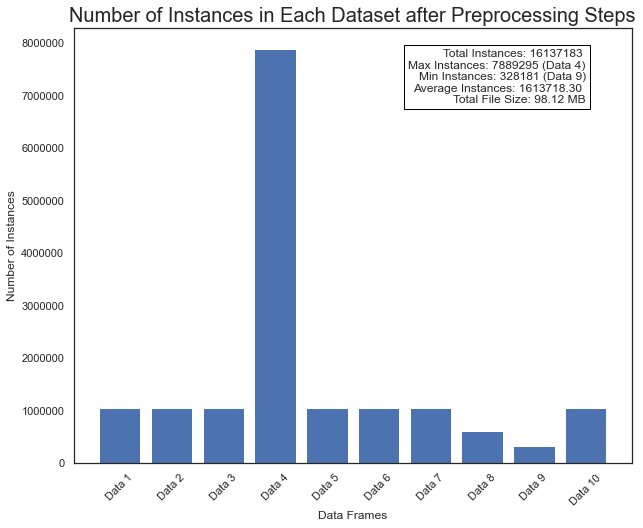

In [212]:
# Change the theme
sns.set_theme(style="white")

# All datasets
dataframes = [data_1_processed, data_2_processed, data_3_processed, data_4_processed, data_5_processed,
             data_6_processed, data_7_processed, data_8_processed, data_9_processed, data_10_processed]

# Get the total number of rows
row_counts = [len(df) for df in dataframes]
total_rows = sum(row_counts)

# Get the column with the maxium number of instances
max_instances = max(row_counts)
max_instances_index = row_counts.index(max_instances)
max_instances_column = f"Data {max_instances_index +1 }"

# Get the column with the lowest number of instances
min_instances = min(row_counts)
min_instances_index = row_counts.index(min_instances)
min_instances_column = f"Data {min_instances_index +1 }"

# Get the average number of instances
average_instances = total_rows / len(dataframes)

# Get the sixe of all the files
sizes = [os.path.getsize(f"data_{i}_processed.parquet") for i in range(1, 11)]
total_size_bytes =  sum(sizes)
total_size_mb = total_size_bytes / (1024 * 1024)

# Create a figure with a specfic size
plt.figure(figsize=(10,8))

# Create a bar chart
plt.bar(range(len(row_counts)), row_counts)
plt.xlabel("Data Frames")
plt.ylabel("Number of Instances")
plt.title("Number of Instances in Each Dataset after Preprocessing Steps", fontsize=20)

# Add labels to the x axis
plt.xticks(range(len(row_counts)), ["Data 1", "Data 2", "Data 3", "Data 4",
                                    "Data 5", "Data 6", "Data 7", "Data 8",
                                    "Data 9", "Data 10"], rotation=45)

# Allow y-axis to have values.
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Add a box with the total amount of rows
info_text = f"Total Instances: {total_rows} \n" \
            f"Max Instances: {max_instances} ({max_instances_column})\n" \
            f"Min Instances: {min_instances} ({min_instances_column})\n" \
            f"Average Instances: {average_instances:.2f} \n" \
            f"Total File Size: {total_size_mb:.2f} MB"


plt.text(len(row_counts) -1, max(row_counts), info_text,
        ha="right", va="top", bbox=dict(facecolor="white",
                                          edgecolor="black"))

# Save the plot to file.
# plt.savefig("C:/Users/Kolobane/OneDrive/CIT MSc Data Science Modules/_Semester Three - Final Project/Project Two - Network Project/Save Plots/Number of Rows in Each Dataset.png")

plt.show()

The Total file size has been reduced to 98Mb. But still contains over 16 million instances so our preprocessing has only removed a small amount. This is good. 

---

## Combine Datasets

In [213]:
# Combine datasets
data_processed = []

for i in range(1, 11):
    filename = f"data_{i}_processed.parquet"
    df = pd.read_parquet(filename)
    data_processed.append(df)
    
combined_df = pd.concat(data_processed)

In [214]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16137183 entries, 0 to 1046016
Data columns (total 80 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Dst Port           int8          
 1   Protocol           int8          
 2   Timestamp          datetime64[ns]
 3   Flow Duration      int8          
 4   Tot Fwd Pkts       int8          
 5   Tot Bwd Pkts       int8          
 6   TotLen Fwd Pkts    int8          
 7   TotLen Bwd Pkts    int8          
 8   Fwd Pkt Len Max    int8          
 9   Fwd Pkt Len Min    int8          
 10  Fwd Pkt Len Mean   int8          
 11  Fwd Pkt Len Std    int8          
 12  Bwd Pkt Len Max    int8          
 13  Bwd Pkt Len Min    int8          
 14  Bwd Pkt Len Mean   int8          
 15  Bwd Pkt Len Std    int8          
 16  Flow Byts/s        int8          
 17  Flow Pkts/s        int8          
 18  Flow IAT Mean      int8          
 19  Flow IAT Std       int8          
 20  Flow IAT Max       int8

### Checks on the combined data

In [215]:
# Any missing values.
combined_df.isnull().sum().sum()

0

Fixed an issue and there are no missing data now

**Results:**

An issue with one of the Labels and I also noted this is still a object when I had converted to a numeric binary value.

In [216]:
# Save the combined 10 processed files into one.
combined_df.to_parquet("combined_data_processed.parquet")

---

In [217]:
print("Notebook ran fully. No issues.")

Notebook ran fully. No issues.


---